In [1]:
import HeatCurrentFunctions as QH
import matplotlib
matplotlib.rcParams['text.usetex'] = False

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc

# Collective Operators for Even (+1) Case
Jm_h = QH.sm1 + QH.sm2 
Jp_h = QH.sp1 + QH.sp2

# Collective Operators for Even (-1) Case
Jm_c = QH.sm1 - QH.sm2
Jp_c = QH.sp1 - QH.sp2

w0 = 1          # LC resonator frequency (sets the unit scale)
Qf = 7.1798      # Resonator quality factor

# Bath coupling strengths
gamma_h   = 0.0075   # Hot bath
gamma_c   = 0.0075   # Cold bath
gamma_local = 0.001 #0.001   # Parasitic relaxation
gamma_deph  = 0 # Pure dephasing (σ_z)

# Temperatures  (ℏ = k_B = 1)
T_local = 0.186    # Parasitic bath, 50 mK
T_h     = 1.2087    # Hot bath, 350 mK
T_c     = 0.186   # Cold bath, 50 mK
N= 51
#R = 10

# Diagnostic: effective temperature of the composite resonator bath
Ts = QH.T_star(T_c, gamma_c, T_h, gamma_h, w0)
print("T* =", Ts)

T* = 0.7877024107695236


In [3]:
# -------------------------------------------------------------------
# Frequency grid and heat-current maps
# -------------------------------------------------------------------
w_vals = np.linspace(0.5, 1.5, N)
W1, W2 = np.meshgrid(w_vals, w_vals)

Q_ind   = np.zeros_like(W1)               # independent current
Q_coll_sup  = np.zeros_like(W1)           # even (+1) case current
Q_coll_sub = np.zeros_like(W1)            # odd case current
Ratio_sup   = np.zeros_like(W1)           # enhancement factor even (+1) case
Ratio_sub   = np.zeros_like(W1)           # suppression factor odd case
Lambda_sup  = np.zeros_like(W1)           # minimum eigenvalue (positivity check) for even (+1) case
Lambda_sub =  np.zeros_like(W1)           # minimum eigenvalue (positivity check) for odd case
Rho_ind = np.zeros_like(W1)               # storing off diagonal coherent terms for the independent case 
Rho_coll_sup_2 = np.zeros((N, N, 4,4))    # storing the steady state density matrix for the even (+1) case 
Rho_coll_sub_2 = np.zeros((N, N, 4,4))    # storing the steady state density matrix for the odd case 
Rho_coll_sup = np.zeros_like(W1)          # storing off diagonal coherent terms for the even (+1) case       
Rho_coll_sub = np.zeros_like(W1)          # storing off diagonal coherent terms for the odd case     
Rho_coll_sup_even = np.zeros((N, N, 4,4)) # storing the steady state density matrix for the Even (-1) case 
Q_coll_sup_even = np.zeros_like(W1)       # even (+1) case current      
Lambda_sup_even = np.zeros_like(W1)       # minimum eigenvalue (positivity check) for even (-1) case
Ratio_sup_even = np.zeros_like(W1)        # enhancement factor even (-1) case
for i, w1 in enumerate(w_vals):
    for j, w2 in enumerate(w_vals):

        # Independent-bath steady state and current
        rho_ind = QH.rho_ss_termic_indepentend(
            w1, w2,
            gamma_local, T_local, gamma_deph,
            T_h, gamma_h, T_c, gamma_c,
            w0, Qf
        )
        Rho_ind[j, i] = np.real(rho_ind[1][1])
        Q_ind[j, i] = QH.Current_ind(w1, w2, rho_ind, T_h, gamma_h, w0, Qf)

        # Collective-bath steady state and current, even (+1) case
        rho_coll_sup = QH.rho_ss_termic_collective_sup(
            w1, w2,
            gamma_local, T_local, gamma_deph,
            T_h, gamma_h, T_c, gamma_c,
            w0, Qf
        )
        Rho_coll_sup_2[j, i, :, :] = np.real(rho_coll_sup.full()) 
        #if ((w1 == 1) and (w2 == 1)):
            #print(rho_coll_sup.full())
        Rho_coll_sup[j, i] = np.real(rho_coll_sup[1][2])
        Q_coll_sup[j, i] = QH.Current_coll(w1, w2, rho_coll_sup, T_h, gamma_h, w0, Qf, Jm_h, Jp_h)

        # Diagnostics
        Lambda_sup[j, i] = np.min(np.linalg.eigvalsh(rho_coll_sup.full()))
        Ratio_sup[j, i]  = Q_coll_sup[j, i] / Q_ind[j, i]
        
        
        # Collective-bath steady state and current, odd case
        rho_coll_sub = QH.rho_ss_termic_collective_sub(
            w1, w2,
            gamma_local, T_local, gamma_deph,
            T_h, gamma_h, T_c, gamma_c,
            w0, Qf
        )
        Rho_coll_sub[j, i] = np.real(rho_coll_sub[1][2])
        Rho_coll_sub_2[j, i, :, :] = np.real(rho_coll_sub.full())
        #print(rho_coll_sub.full())
        Q_coll_sub[j, i] = QH.Current_coll(w1, w2, rho_coll_sub, T_h, gamma_h, w0, Qf, Jm_h, Jp_h)

        # Diagnostics
        Lambda_sub[j, i] = np.min(np.linalg.eigvalsh(rho_coll_sub.full()))
        Ratio_sub[j, i]  = Q_coll_sub[j, i] / Q_ind[j, i]
        
        
        # Collective-bath steady state and current, even (-1) case
        rho_coll_sup2 = QH.rho_ss_termic_collective_sup_2(
            w1, w2,
            gamma_local, T_local, gamma_deph,
            T_h, gamma_h, T_c, gamma_c,
            w0, Qf
        )
        Rho_coll_sup_even[j, i, :, :] = np.abs(rho_coll_sup2.full())
        Q_coll_sup_even[j, i] = QH.Current_coll(w1, w2, rho_coll_sup2, T_h, gamma_h, w0, Qf, Jm_c, Jp_c)

        # Diagnostics
        Lambda_sup_even[j, i] = np.min(np.linalg.eigvalsh(rho_coll_sup2.full()))
        Ratio_sup_even[j, i]  = Q_coll_sup_even[j, i] / Q_ind[j, i]

In [5]:
Rho_coll_sup_2[25, 25, :, :]

array([[ 3.19625679e-02,  0.00000000e+00,  0.00000000e+00,
        -6.14881406e-06],
       [ 0.00000000e+00,  1.01534444e-01,  6.61975499e-02,
         0.00000000e+00],
       [ 0.00000000e+00,  6.61975499e-02,  1.01534444e-01,
         0.00000000e+00],
       [-6.14881406e-06,  0.00000000e+00,  0.00000000e+00,
         7.64968544e-01]])

In [6]:
Rho_coll_sub_2[25, 25, :, :]

array([[ 3.84166760e-02,  0.00000000e+00,  0.00000000e+00,
        -1.86969589e-06],
       [ 0.00000000e+00,  1.22054049e-01,  8.05102666e-02,
         0.00000000e+00],
       [ 0.00000000e+00,  8.05102666e-02,  1.22054049e-01,
         0.00000000e+00],
       [-1.86969589e-06,  0.00000000e+00,  0.00000000e+00,
         7.17475226e-01]])

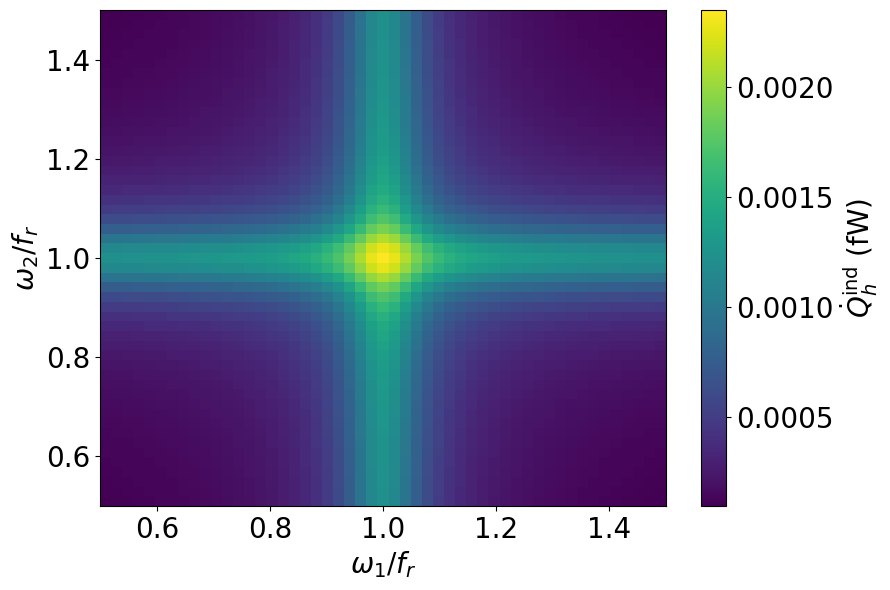

In [4]:
# Plotting the independent case
plt.figure(figsize=(9, 6))
#rc('text',usetex=True)

cp = plt.imshow(
    0.662607015*(Q_ind), 
    extent=(w_vals.min(), w_vals.max(), w_vals.min(), w_vals.max()),
    aspect='auto',
    origin='lower'
)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.xlabel(r'$\omega_1/f_r$', fontsize=20)
plt.ylabel(r'$\omega_2/f_r$', fontsize=20)

cbar = plt.colorbar(cp)
# Imposto la label con fontsize
cbar.set_label(r'$\dot Q^{\rm ind}_h$ (fW)', fontsize=20)
# Regolo la dimensione dei tick
cbar.ax.tick_params(labelsize=20)

plt.tight_layout()

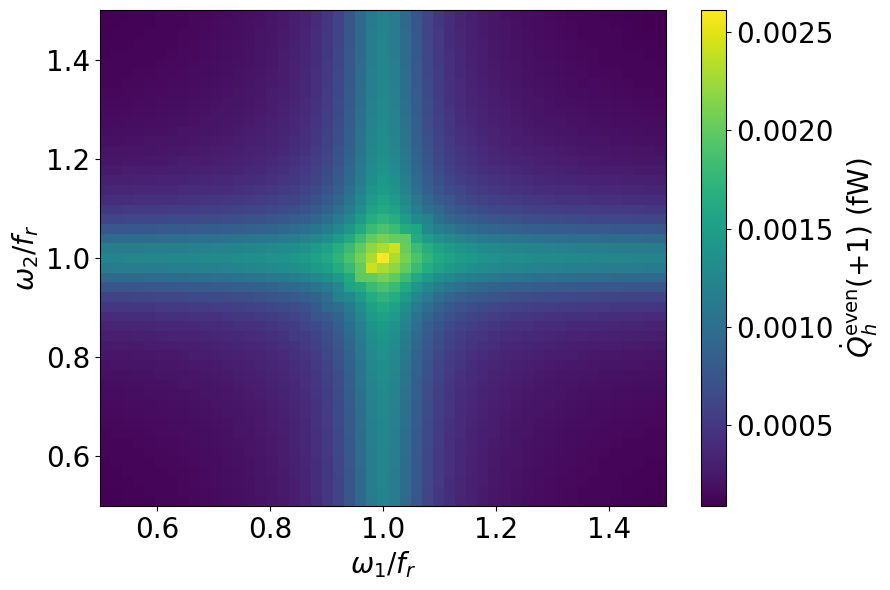

In [6]:
# Plotting the collective even (+1) case
plt.figure(figsize=(9, 6))
#rc('text',usetex=True)

cp = plt.imshow(
    0.662607015*(Q_coll_sup),  
    extent=(w_vals.min(), w_vals.max(), w_vals.min(), w_vals.max()),
    aspect='auto',
    origin='lower'
)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.xlabel(r'$\omega_1/f_r$', fontsize=20)
plt.ylabel(r'$\omega_2/f_r$', fontsize=20)

cbar = plt.colorbar(cp)
# Imposto la label con fontsize
cbar.set_label(r'$\dot Q_h^{\rm even} (+1)$ (fW)', fontsize=20)
# Regolo la dimensione dei tick
cbar.ax.tick_params(labelsize=20)
plt.tight_layout()

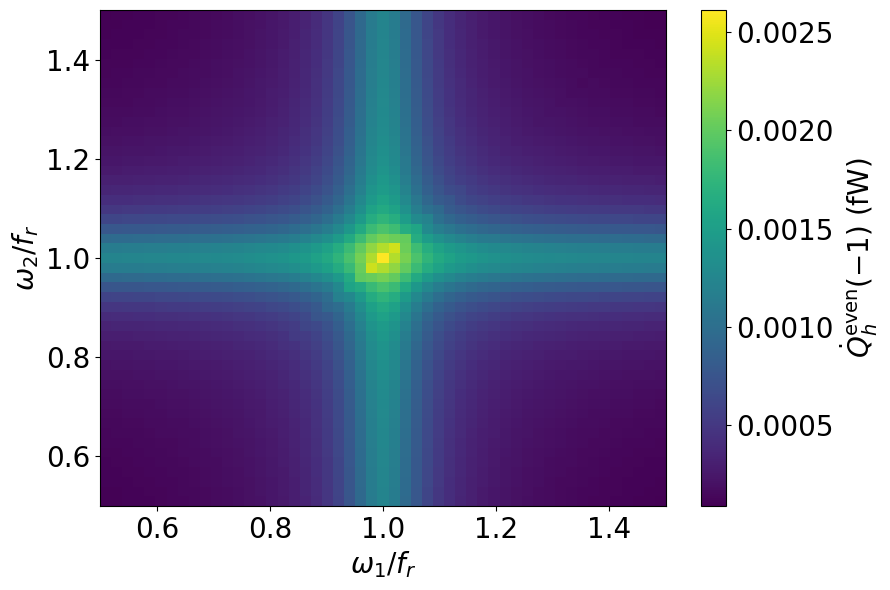

In [7]:
# Plotting the collective even (-1) case
plt.figure(figsize=(9, 6))
#rc('text',usetex=True)

cp = plt.imshow(
    0.662607015*(Q_coll_sup_even),  
    extent=(w_vals.min(), w_vals.max(), w_vals.min(), w_vals.max()),
    aspect='auto',
    origin='lower'
)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.xlabel(r'$\omega_1/f_r$', fontsize=20)
plt.ylabel(r'$\omega_2/f_r$', fontsize=20)

cbar = plt.colorbar(cp)
# Imposto la label con fontsize
cbar.set_label(r'$\dot Q_h^{\rm even} (-1)$ (fW)', fontsize=20)
# Regolo la dimensione dei tick
cbar.ax.tick_params(labelsize=20)
plt.tight_layout()

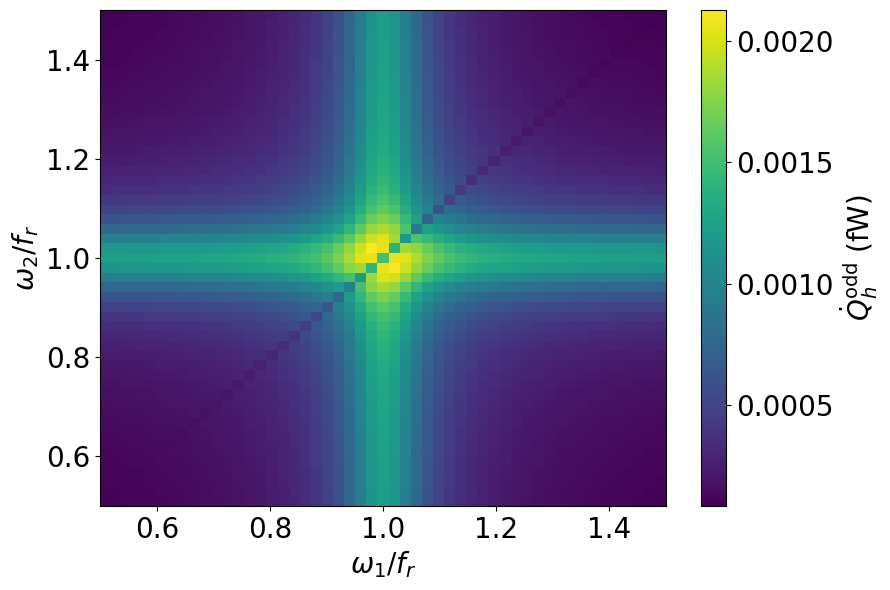

In [8]:
# Plotting the collective odd case
plt.figure(figsize=(9, 6))
#rc('text',usetex=True)

cp = plt.imshow(
    0.662607015*(Q_coll_sub),  # negative heat current for display
    extent=(w_vals.min(), w_vals.max(), w_vals.min(), w_vals.max()),
    aspect='auto',
    origin='lower'
)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.xlabel(r'$\omega_1/f_r$', fontsize=20)
plt.ylabel(r'$\omega_2/f_r$', fontsize=20)

cbar = plt.colorbar(cp)
# Imposto la label con fontsize
cbar.set_label(r'$\dot Q_h^{\rm odd}$ (fW)', fontsize=20)
# Regolo la dimensione dei tick
cbar.ax.tick_params(labelsize=20)
plt.tight_layout()

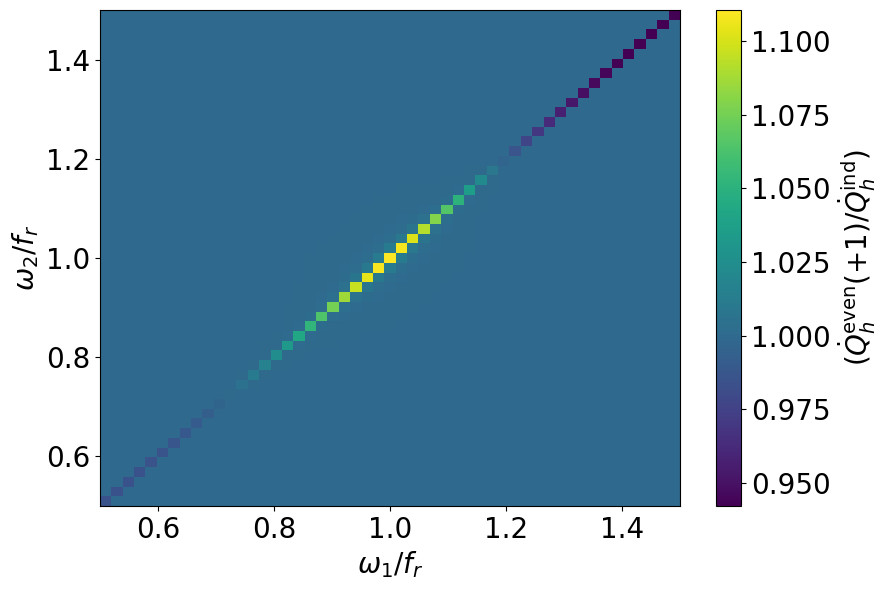

In [9]:
# Plotting the collective even case (+1) enhancement
plt.figure(figsize=(9, 6))
#rc('text',usetex=True)

cp = plt.imshow(
    Ratio_sup,  
    extent=(w_vals.min(), w_vals.max(), w_vals.min(), w_vals.max()),
    aspect='auto',
    origin='lower'
)


plt.xticks(fontsize=20)
plt.yticks(fontsize=20)


plt.xlabel(r'$\omega_1/f_r$', fontsize=20)
plt.ylabel(r'$\omega_2/f_r$', fontsize=20)



# Catturo la colorbar in 'cbar'
cbar = plt.colorbar(cp)
# Imposto la label con fontsize
cbar.set_label(r'$(\dot Q_h^{\rm even} (+1)/\dot Q_h^{\rm ind})$', fontsize=20)
# Regolo la dimensione dei tick
cbar.ax.tick_params(labelsize=20)

plt.tight_layout()

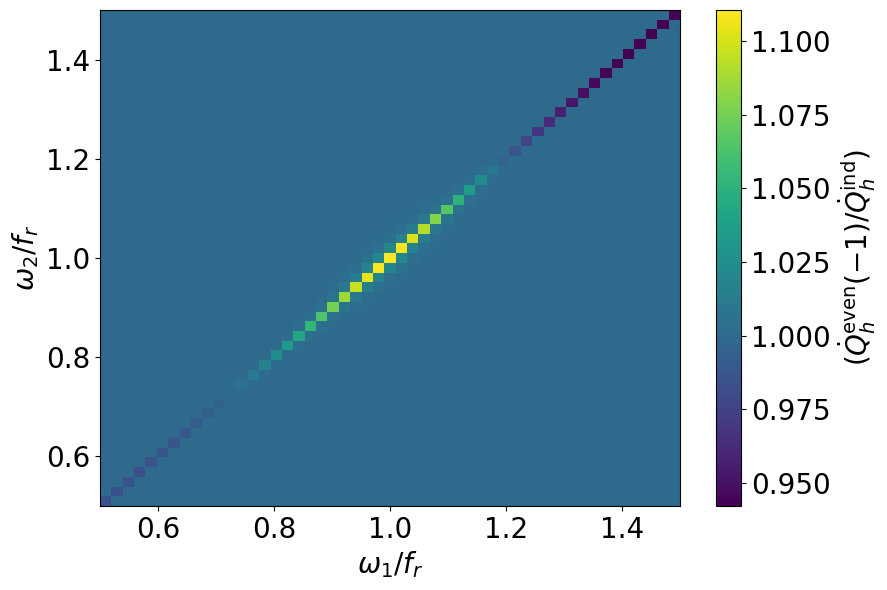

In [10]:
# Plotting the collective even case (-1) enhancement
plt.figure(figsize=(9, 6))
matplotlib.rcParams['text.usetex'] = False

cp = plt.imshow(
    Ratio_sup_even,  
    extent=(w_vals.min(), w_vals.max(), w_vals.min(), w_vals.max()),
    aspect='auto',
    origin='lower'
)


plt.xticks(fontsize=20)
plt.yticks(fontsize=20)


plt.xlabel(r'$\omega_1/f_r$', fontsize=20)
plt.ylabel(r'$\omega_2/f_r$', fontsize=20)



# Catturo la colorbar in 'cbar'
cbar = plt.colorbar(cp)
# Imposto la label con fontsize
cbar.set_label(r'$(\dot Q_h^{\rm even} (-1)/\dot Q_h^{\rm ind})$', fontsize=20)
# Regolo la dimensione dei tick
cbar.ax.tick_params(labelsize=20)

plt.tight_layout()

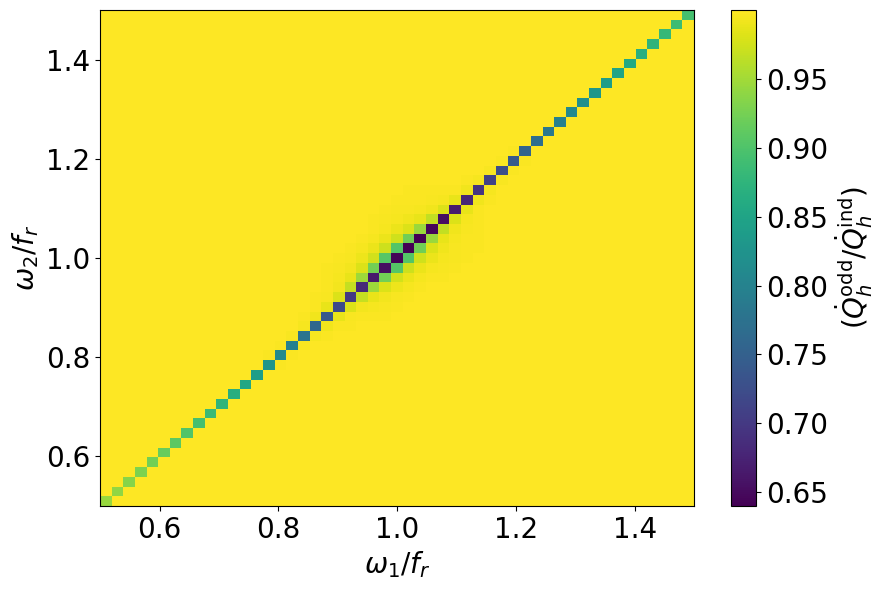

In [11]:
# Plotting the collective odd case suppression
plt.figure(figsize=(9, 6))
#rc('text',usetex=True)

cp = plt.imshow(
    Ratio_sub,  
    extent=(w_vals.min(), w_vals.max(), w_vals.min(), w_vals.max()),
    aspect='auto',
    origin='lower'
)


plt.xticks(fontsize=20)
plt.yticks(fontsize=20)


plt.xlabel(r'$\omega_1/f_r$', fontsize=20)
plt.ylabel(r'$\omega_2/f_r$', fontsize=20)



# Catturo la colorbar in 'cbar'
cbar = plt.colorbar(cp)
# Imposto la label con fontsize
cbar.set_label(r'$(\dot Q_h^{\rm odd}/\dot Q_h^{\rm ind})$', fontsize=20)
# Regolo la dimensione dei tick
cbar.ax.tick_params(labelsize=20)

plt.tight_layout()

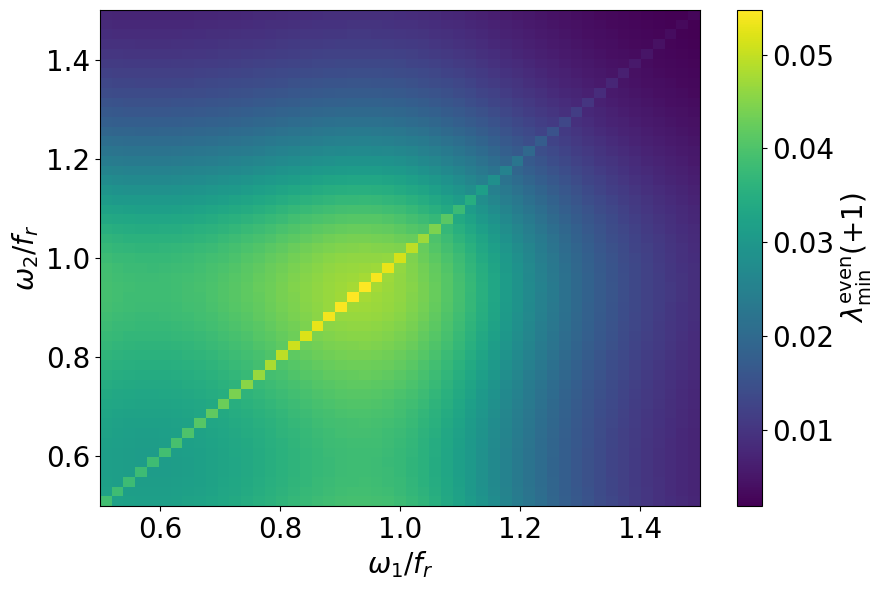

In [12]:
# Minimum eigenvalue check for collective even(+1) case
plt.figure(figsize=(9, 6))
#rc('text',usetex=True)

cp = plt.imshow(
    Lambda_sup,  # negative heat current for display
    extent=(w_vals.min(), w_vals.max(), w_vals.min(), w_vals.max()),
    aspect='auto',
    origin='lower'
)


plt.xticks(fontsize=20)
plt.yticks(fontsize=20)


plt.xlabel(r'$\omega_1/f_r$', fontsize=20)
plt.ylabel(r'$\omega_2/f_r$', fontsize=20)



# Catturo la colorbar in 'cbar'
cbar = plt.colorbar(cp)
# Imposto la label con fontsize
cbar.set_label(r'$\lambda_{\rm min}^{\rm even} (+1)$', fontsize=20)
# Regolo la dimensione dei tick
cbar.ax.tick_params(labelsize=20)

plt.tight_layout()

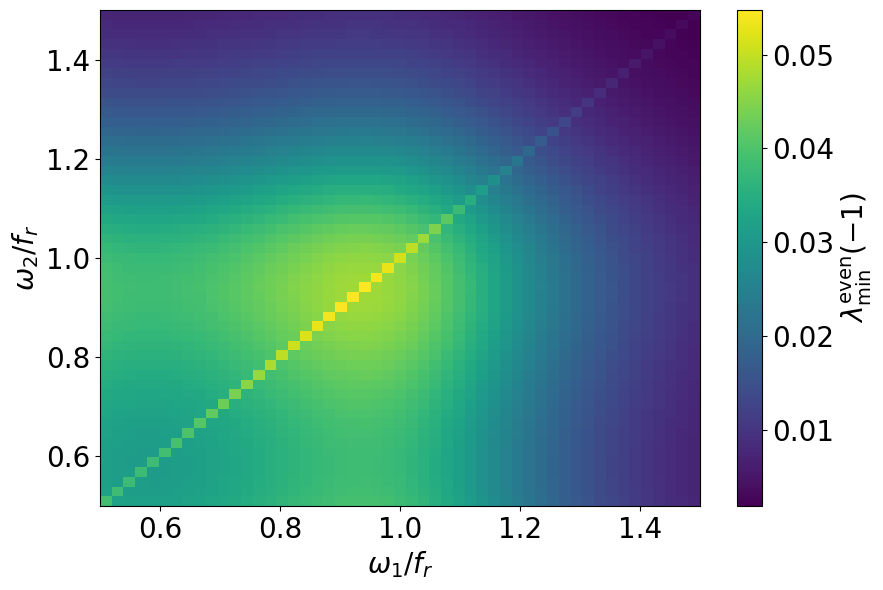

In [13]:
# Minimum eigenvalue check for collective even(-1) case
plt.figure(figsize=(9, 6))
#rc('text',usetex=True)

cp = plt.imshow(
    Lambda_sup_even,  # negative heat current for display
    extent=(w_vals.min(), w_vals.max(), w_vals.min(), w_vals.max()),
    aspect='auto',
    origin='lower'
)


plt.xticks(fontsize=20)
plt.yticks(fontsize=20)


plt.xlabel(r'$\omega_1/f_r$', fontsize=20)
plt.ylabel(r'$\omega_2/f_r$', fontsize=20)



# Catturo la colorbar in 'cbar'
cbar = plt.colorbar(cp)
# Imposto la label con fontsize
cbar.set_label(r'$\lambda_{\rm min}^{\rm even} (-1)$', fontsize=20)
# Regolo la dimensione dei tick
cbar.ax.tick_params(labelsize=20)

plt.tight_layout()

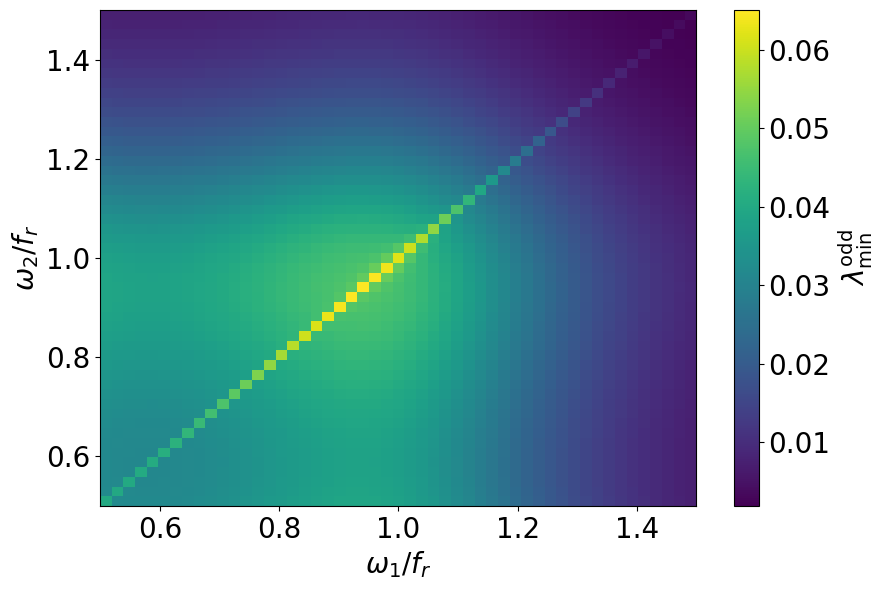

In [14]:
# Minimum eigenvalue check for collective odd case
plt.figure(figsize=(9, 6))
matplotlib.rcParams['text.usetex'] = False

cp = plt.imshow(
    Lambda_sub,  # negative heat current for display
    extent=(w_vals.min(), w_vals.max(), w_vals.min(), w_vals.max()),
    aspect='auto',
    origin='lower'
)


plt.xticks(fontsize=20)
plt.yticks(fontsize=20)


plt.xlabel(r'$\omega_1/f_r$', fontsize=20)
plt.ylabel(r'$\omega_2/f_r$', fontsize=20)



# Catturo la colorbar in 'cbar'
cbar = plt.colorbar(cp)
# Imposto la label con fontsize
cbar.set_label(r'$\lambda_{\rm min}^{\rm odd}$', fontsize=20)
# Regolo la dimensione dei tick
cbar.ax.tick_params(labelsize=20)

plt.tight_layout()

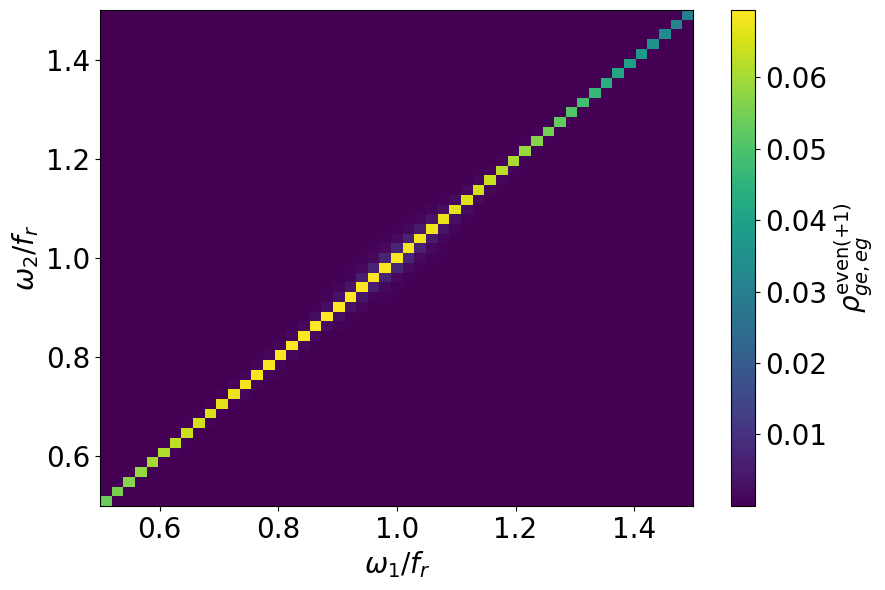

In [15]:
# Plotting one of the coherence terms in the density matrix

plt.figure(figsize=(9, 6))
#rc('text',usetex=True)

cp = plt.imshow(
    Rho_coll_sup,  
    extent=(w_vals.min(), w_vals.max(), w_vals.min(), w_vals.max()),
    aspect='auto',
    origin='lower',
)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.xlabel(r'$\omega_1/f_r$', fontsize=20)
plt.ylabel(r'$\omega_2/f_r$', fontsize=20)

cbar = plt.colorbar(cp)
# Imposto la label con fontsize
cbar.set_label(r'$\rho_{ge, eg}^{\rm even (+1)}$', fontsize=20)
# Regolo la dimensione dei tick
cbar.ax.tick_params(labelsize=20)
plt.tight_layout()

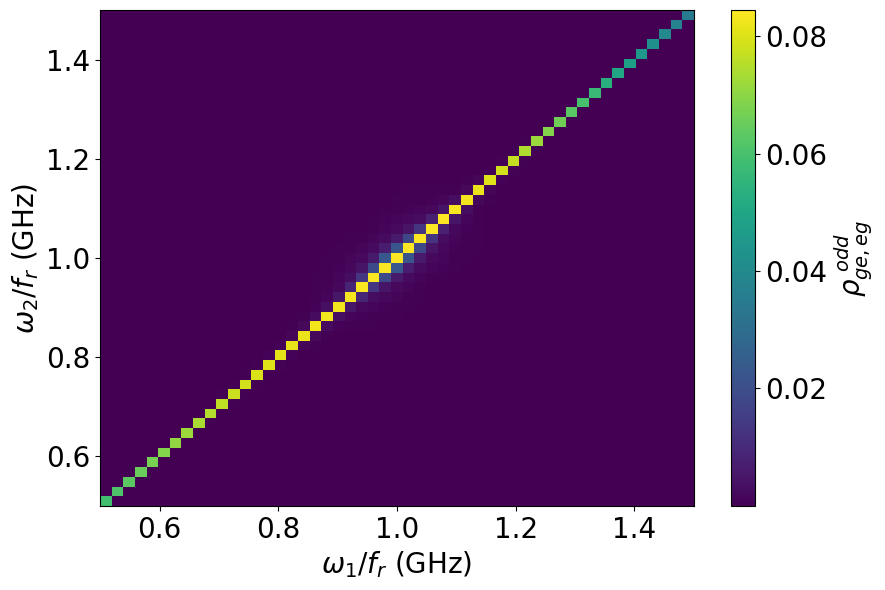

In [16]:
# Plotting one of the coherence terms in the density matrix

plt.figure(figsize=(9, 6))
#rc('text',usetex=True)

cp = plt.imshow(
    Rho_coll_sub,  
    extent=(w_vals.min(), w_vals.max(), w_vals.min(), w_vals.max()),
    aspect='auto',
    origin='lower',
)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.xlabel(r'$\omega_1/f_r$ (GHz)', fontsize=20)
plt.ylabel(r'$\omega_2/f_r$ (GHz)', fontsize=20)

cbar = plt.colorbar(cp)
# Imposto la label con fontsize
cbar.set_label(r'$\rho_{ge, eg}^{\ odd}$', fontsize=20)
# Regolo la dimensione dei tick
cbar.ax.tick_params(labelsize=20)
plt.tight_layout()

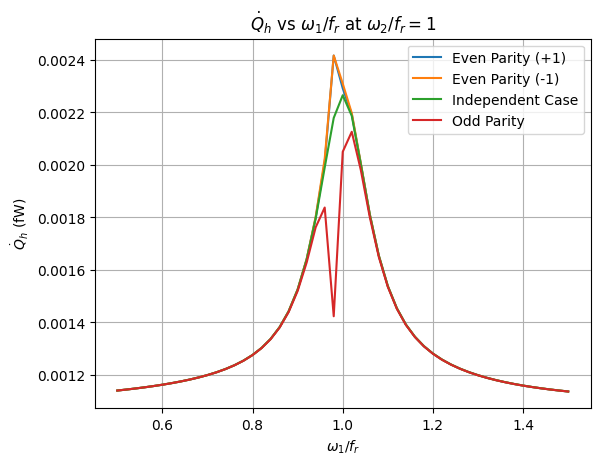

In [17]:
# Plotting a linecut of keeping one qubit at resonance and sweeping the other qubit for all 4 cases discussed

sup = (0.662607015*Q_coll_sup[:, 24]) # in fW
ind = (0.662607015*Q_ind[:, 24])
sub = (0.662607015*Q_coll_sub[:, 24])
sup_2 = (0.662607015*Q_coll_sup_even[:, 24])
#i1_axis = w_vals  # in mA

# Plot it

plt.plot(w_vals, sup, label = 'Even Parity (+1)')
plt.plot(w_vals, sup_2, label = 'Even Parity (-1)')
plt.plot(w_vals, ind, label = 'Independent Case')
plt.plot(w_vals, sub, label = 'Odd Parity')
plt.xlabel(r'$\omega_1/f_r$')
plt.ylabel(r'$\dot{Q}_h$ (fW)')
plt.title(r'$\dot{Q}_h$ vs $\omega_1/f_r$ at $\omega_2/f_r = 1$')
plt.legend()
plt.grid(True)
plt.show()
#np.max(horizontal_cut)

In [35]:
# Calculating the dependence of Heat Current at resonance for all 4 cases discussed againt the parasitic bath temperature

N2 = 1000
w0 = 1             # LC resonator frequency (sets the unit scale)
w1 = 1             # Qubit 1 frequency
w2 = 1.02          # Qubit 2 frequency for testing detuned case 
Qf_2 = 7.1798      # Resonator quality factor

# Bath coupling strengths
gamma_h_2   = 0.0075 # Hot bath coupling
gamma_c_2   = 0.0075 # Cold bath coupling
gamma_deph_2 = 0     # Pure dephasing (σ_z)
gamma_p_2 = 0.001      # Parasitic bath relaxation


# Temperatures  (ℏ = k_B = 1)
T_h_2     = 1.2087                    # Hot bath
T_c_2     = 0.186                     # Cold bath
T_par = np.linspace(0.186, 1.673, N2) # Parasitic Bath


Q_ind_2   = np.zeros(N2)      # independent current
Q_coll_sup_2  = np.zeros(N2)  # collective current for even (+1) case
Q_coll_sub_2  = np.zeros(N2)  # collective current for odd case
Ratio_sup_2   = np.zeros(N2)  # enhancement factor for even (+1) case
Ratio_sub_2   = np.zeros(N2)  # suppression factor for odd case 
Q_coll_even_2 = np.zeros(N2)  # collective current for even (-1) case
Ratio_even_2 = np.zeros(N2)   # enhancement factor for even (-1) case



for k, T_p in enumerate(T_par):
    

    # Independent-bath steady state and current
    rho_ind = QH.rho_ss_termic_indepentend(
        w1, w1,
        gamma_p_2, T_p, gamma_deph_2,
        T_h_2, gamma_h_2, T_c_2, gamma_c_2,
        w0, Qf_2
    )
    Q_ind_2[k] = QH.Current_ind(w1, w1, rho_ind, T_h_2, gamma_h_2, w0, Qf_2)
    
    

    # Collective-bath steady state and current for even (+1) case
    rho_coll_sup = QH.rho_ss_termic_collective_sup(
        w1, w1,
        gamma_p_2, T_p, gamma_deph_2,
        T_h_2, gamma_h_2, T_c_2, gamma_c_2,
        w0, Qf_2
    )
    Q_coll_sup_2[k] = QH.Current_coll(w1, w1, rho_coll_sup, T_h_2, gamma_h_2, w0, Qf_2, Jm_h, Jp_h)
    Ratio_sup_2[k]  = Q_coll_sup_2[k] / Q_ind_2[k]
    
    
    # Collective-bath steady state and current for odd case
    rho_coll_sub = QH.rho_ss_termic_collective_sub(
        w1, w1,
        gamma_p_2, T_p, gamma_deph_2,
        T_h_2, gamma_h_2, T_c_2, gamma_c_2,
        w0, Qf_2
    )
    Q_coll_sub_2[k] = QH.Current_coll(w1, w1, rho_coll_sub, T_h_2, gamma_h_2, w0, Qf_2, Jm_h, Jp_h)
    Ratio_sub_2[k]  = Q_coll_sub_2[k] / Q_ind_2[k]
    
    
    
    # Collective-bath steady state and current for even(-1) case
    rho_coll_even_2 = QH.rho_ss_termic_collective_sup_2(
        w1, w1,
        gamma_p_2, T_p, gamma_deph_2,
        T_h_2, gamma_h_2, T_c_2, gamma_c_2,
        w0, Qf_2
    )
    Q_coll_even_2[k] = QH.Current_coll(w1, w1, rho_coll_even_2, T_h_2, gamma_h_2, w0, Qf_2, Jm_c, Jp_c)   
    Ratio_even_2[k]  = Q_coll_even_2[k] / Q_ind_2[k]
    

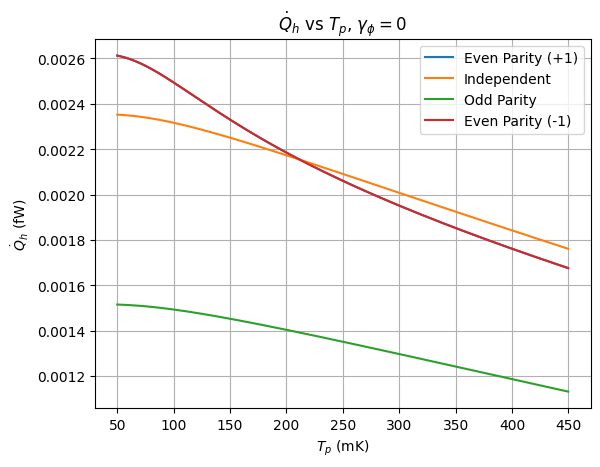

In [36]:
# Plotting parasitic bath dependence at resonance for all 4 cases discussed

T_parT = (T_par*5.6*10**9*6.626*10**(-34))/(1.38*10**(-23))
plt.plot(T_parT*1e3, 0.662607015*Q_coll_sup_2, label = 'Even Parity (+1)')
plt.plot(T_parT*1e3, 0.662607015*Q_ind_2, label = 'Independent')
plt.plot(T_parT*1e3, 0.662607015*Q_coll_sub_2, label = 'Odd Parity')
plt.plot(T_parT*1e3, 0.662607015*Q_coll_even_2, label = 'Even Parity (-1)')
plt.xlabel(r'$T_p$ (mK)')
plt.ylabel(r'$\dot{Q}_h$ (fW)')
plt.title(r'$\dot{Q}_h$ vs $T_p$, $\gamma_{\phi} = 0$')
plt.legend()
plt.grid(True)
plt.show()

In [39]:
# Calculating the dependence of Heat Current at resonance for all 4 cases discussed againt pure dephasing

N3 = 1000
gamma_p_3 = 0.001 # Parasitic bath relaxation
gamma_deph_3  = np.linspace(0.0001, 0.1, N3)  # Pure dephasing (σ_z)
gamma_h_3   = 0.0075 # Hot bath coupling
gamma_c_3   = 0.0075 # Cold bath coupling
Qf_3 = 7.1798

# Temperatures  (ℏ = k_B = 1)
T_para_3 = 0.186    # Parasitic bath
T_h_3     = 1.2087   # Hot bath
T_c_3     = 0.186    # Cold bath


Q_ind_3   = np.zeros(N3)      # independent current
Q_coll_sup_3  = np.zeros(N3)  # collective current for even (+1) case
Q_coll_sub_3  = np.zeros(N3)  # collective current for odd case 
Ratio_sup_3   = np.zeros(N3)  # enhancement factor for even (+1) case
Ratio_sub_3   = np.zeros(N3)  # suppression factor for odd case
Q_coll_even_3 = np.zeros(N3)  # collective current for even (+1) case
Ratio_even_3 = np.zeros(N3)
Rho_coll_sup_deph = np.zeros((N3,4,4))
Rho_coll_sub_deph = np.zeros((N3,4,4))


for k, gamma_d in enumerate(gamma_deph_3):

    # Independent-bath steady state and current
    rho_ind = QH.rho_ss_termic_indepentend(
        1, 1,
        gamma_p_3, T_para_3, gamma_d,
        T_h_3, gamma_h_3, T_c_3, gamma_c_3,
        w0, Qf_3
    )
    Q_ind_3[k] = QH.Current_ind(1, 1, rho_ind, T_h_3, gamma_h_3, w0, Qf_3)

    # Collective-bath steady state and current for even case (+1)
    rho_coll_sup = QH.rho_ss_termic_collective_sup(
        1, 1,
        gamma_p_3, T_para_3, gamma_d,
        T_h_3, gamma_h_3, T_c_3, gamma_c_3,
        w0, Qf_3
    )
    Rho_coll_sup_deph[k, :, :] = np.real(rho_coll_sup.full())
    Q_coll_sup_3[k] = QH.Current_coll(1, 1, rho_coll_sup, T_h_3, gamma_h_3, w0, Qf_3, Jm_h, Jp_h)


    Ratio_sup_3[k]  = Q_coll_sup_3[k] / Q_ind_3[k]
    
    
    # Collective-bath steady state and current for odd case
    rho_coll_sub = QH.rho_ss_termic_collective_sub(
        1, 1,
        gamma_p_3, T_para_3, gamma_d,
        T_h_3, gamma_h_3, T_c_3, gamma_c_3,
        w0, Qf_3
    )
    
    Rho_coll_sub_deph[k, :, :] = np.real(rho_coll_sub.full())
    Q_coll_sub_3[k] = QH.Current_coll(1, 1, rho_coll_sub, T_h_3, gamma_h_3, w0, Qf_3, Jm_h, Jp_h)


    Ratio_sub_3[k]  = Q_coll_sub_3[k] / Q_ind_3[k]
    
    
    # Collective-bath steady state and current for even case (-1)
    rho_coll_even_3 = QH.rho_ss_termic_collective_sup_2(
        1, 1,
        gamma_p_3, T_para_3, gamma_d,
        T_h_3, gamma_h_3, T_c_3, gamma_c_3,
        w0, Qf_3
    )
    Q_coll_even_3[k] = QH.Current_coll(1, 1, rho_coll_even_3, T_h_3, gamma_h_3, w0, Qf_3, Jm_c, Jp_c)


    Ratio_even_3[k]  = Q_coll_even_3[k] / Q_ind_3[k]
    
    

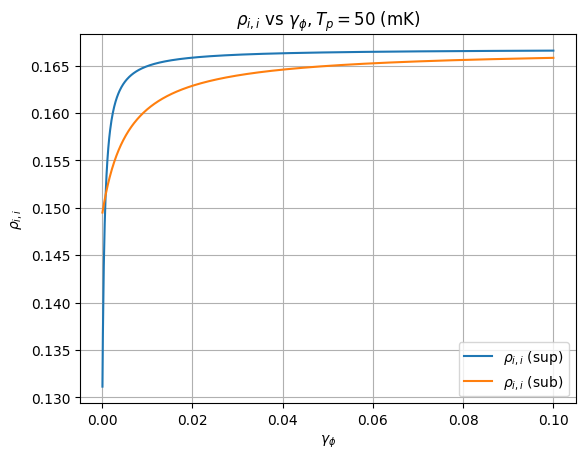

In [40]:
plt.plot(gamma_deph_3, Rho_coll_sup_deph[:, 1, 1], label = r'$\rho_{i,i}$ (sup)')
plt.plot(gamma_deph_3, Rho_coll_sub_deph[:, 1, 1], label = r'$\rho_{i,i}$ (sub)')
plt.xlabel(r'$\gamma_{\phi}$')
plt.ylabel(r'$\rho_{i,i}$')
plt.title(r'$\rho_{i,i}$ vs $\gamma_{\phi}, T_p = 50$ (mK)')
plt.legend()
plt.grid(True)
plt.show()

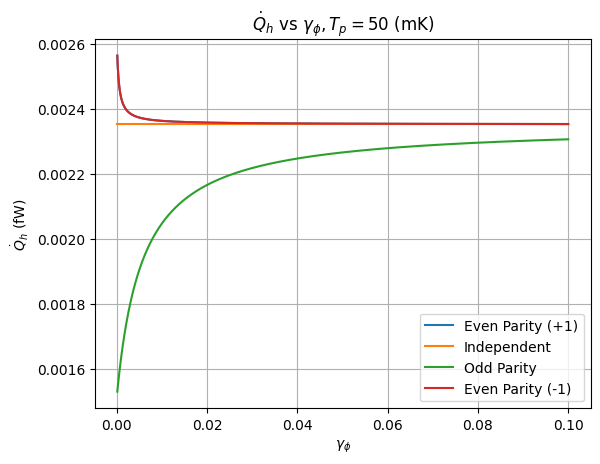

In [41]:
# Plotting pure dephasing dependence at resonance for all 4 cases discussed

plt.plot(gamma_deph_3, 0.662607015*Q_coll_sup_3, label = 'Even Parity (+1)')
plt.plot(gamma_deph_3, 0.662607015*Q_ind_3, label = 'Independent')
plt.plot(gamma_deph_3, 0.662607015*Q_coll_sub_3, label = 'Odd Parity')
plt.plot(gamma_deph_3, 0.662607015*Q_coll_even_3, label = 'Even Parity (-1)')
plt.xlabel(r'$\gamma_{\phi}$')
plt.ylabel(r'$\dot{Q}_h$ (fW)')
plt.title(r'$\dot{Q}_h$ vs $\gamma_{\phi}, T_p = 50$ (mK)')
plt.legend()
plt.grid(True)
plt.show()

In [20]:
# Calculating the dependence of Heat Current at resonance for all 4 cases discussed againt Hot bath coupling strength
# while keeping cold bath fixed

N4 = 1000
Qf_4 = 7.1798      # LC Resonator Quality Factor
gamma_p_4 = 0.001  # Parasitic relaxation
gamma_deph_4  = 0  # Pure dephasing (σ_z)

# Temperatures  (ℏ = k_B = 1)
T_para_4 = 0.186                         # Parasitic bath
T_h_4    = 1.2087                        # Hot bath
T_c_4     = 0.186                         # Cold bath   
gamma_h_4 = np.linspace(0.005, 0.2, N4) # Hot bath coupling
gamma_c_4 = gamma_h_4                   # Cold bath coupling


Q_ind_4   = np.zeros(N4)      # independent current
Q_coll_sup_4  = np.zeros(N4)  # collective current for even case (+1)
Q_coll_sub_4  = np.zeros(N4)  # collective current for odd case
Ratio_sup_4   = np.zeros(N4)  # enhancement factor for even case (+1)
Ratio_sub_4   = np.zeros(N4)  # suppression factor for odd case
Q_coll_even_4 = np.zeros(N4)  # collective current for even case (-1)
Ratio_even_4 = np.zeros(N4)   # enhancement factor for even case (-1)


for k, gh in enumerate(gamma_h_4):

    # Independent-bath steady state and current
    rho_ind = QH.rho_ss_termic_indepentend(
        1, 1.02,
        gamma_p_4, T_para_4, gamma_deph_4,
        T_h_4, gh, T_c_4, gamma_c_4[k],
        w0, Qf_4
    )
    Q_ind_4[k] = QH.Current_ind(1, 1.02, rho_ind, T_h_4, gh, w0, Qf_4)
    
    

    # Collective-bath steady state and current for even case (+1)
    rho_coll_sup = QH.rho_ss_termic_collective_sup(
        1, 1.02,
        gamma_p_4, T_para_4, gamma_deph_4,
        T_h_4, gh, T_c_4, gamma_c_4[k],
        w0, Qf_4
    )
    Q_coll_sup_4[k] = QH.Current_coll(1, 1.02, rho_coll_sup, T_h_4, gh, w0, Qf_4, Jm_h, Jp_h)


    Ratio_sup_4[k]  = Q_coll_sup_4[k] / Q_ind_4[k]
    
    
    # Collective-bath steady state and current for odd case
    rho_coll_sub = QH.rho_ss_termic_collective_sub(
        1, 1.02,
        gamma_p_4, T_para_4, gamma_deph_4,
        T_h_4, gh, T_c_4, gamma_c_4[k],
        w0, Qf_4
    )
    Q_coll_sub_4[k] = QH.Current_coll(1, 1.02, rho_coll_sub, T_h_4, gh, w0, Qf_4, Jm_h, Jp_h)


    Ratio_sub_4[k]  = Q_coll_sub_4[k] / Q_ind_4[k]
    
    
    
    # Collective-bath steady state and current for even case (-1)
    rho_coll_even_4 = QH.rho_ss_termic_collective_sup_2(
        1, 1.02,
        gamma_p_4, T_para_4, gamma_deph_4,
        T_h_4, gh, T_c_4, gamma_c_4[k],
        w0, Qf_4
    )
    Q_coll_even_4[k] = QH.Current_coll(1, 1.02, rho_coll_even_4, T_h_4, gh, w0, Qf_4, Jm_c, Jp_c)


    Ratio_even_4[k]  = Q_coll_even_4[k] / Q_ind_4[k]
    

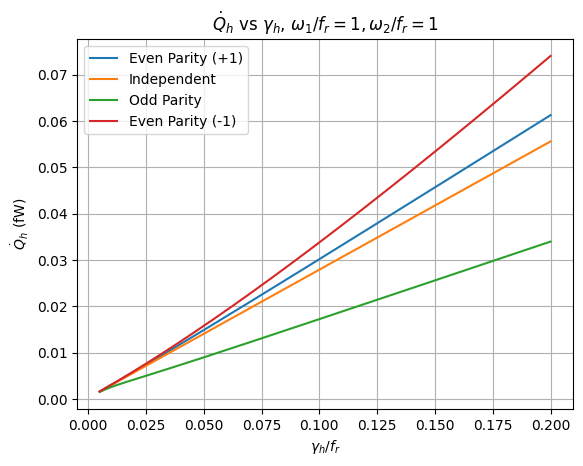

In [21]:
# Plotting hot bath coupling dependence at resonance for all 4 cases discussed
plt.plot(gamma_h_4, 0.662607015*Q_coll_sup_4, label = 'Even Parity (+1)')
plt.plot(gamma_h_4, 0.662607015*Q_ind_4, label = 'Independent')
plt.plot(gamma_h_4, 0.662607015*Q_coll_sub_4, label = 'Odd Parity')
plt.plot(gamma_h_4, 0.662607015*Q_coll_even_4, label = 'Even Parity (-1)')
plt.xlabel(r'$\gamma_{h}/f_r$')
plt.ylabel(r'$\dot{Q}_h$ (fW)')
plt.title(r'$\dot{Q}_h$ vs $\gamma_h$, $\omega_1/f_r = 1, \omega_2/f_r = 1$')
plt.legend()
plt.grid(True)
plt.show()

In [44]:
# Calculating Hot Bath Temperature Dependence at resonance for all 4 cases discussed
N5 = 1000

T_h_5     = np.linspace(0.372, 1.2087, N5) # Hot Bath Temperature 
gamma_h_5 = 0.0075                         # Hot Bath Coupling
gamma_c_5 = gamma_h_5                     # Cold Bath Coupling
gamma_p_5 = 0.001
gamma_deph_5 = 0
T_para_5 = 0.186
T_c_5 = 0.186
Qf_5 = 7.1798

Q_ind_5   = np.zeros(N5)   # independent current
Q_coll_sup_5  = np.zeros(N5)  # collective current for even (+1) case
Q_coll_sub_5  = np.zeros(N5)  # collective current for odd case
Ratio_sup_5  = np.zeros(N5)   # enhancement factor for even (+1) case
Ratio_sub_5   = np.zeros(N5)  # suppression factor for odd case
Q_coll_even_5  = np.zeros(N5) # collective current for even (-1) case
Ratio_even_5  = np.zeros(N5)  # enhancement factor for even (-1) case


for k, Th in enumerate(T_h_5):

    # Independent-bath steady state and current
    rho_ind = QH.rho_ss_termic_indepentend(
        1, 1,
        gamma_p_5, T_para_5, gamma_deph_5,
        Th, gamma_h_5, T_c_5, gamma_c_5,
        w0, Qf_5
    )
    Q_ind_5[k] = QH.Current_ind(1, 1, rho_ind, Th, gamma_h_5, w0, Qf_5)
    

    # Collective-bath steady state and current for even (+1) case
    rho_coll_sup = QH.rho_ss_termic_collective_sup(
        1, 1,
        gamma_p_5, T_para_5, gamma_deph_5,
        Th, gamma_h_5, T_c_5, gamma_c_5,
        w0, Qf_5
    )
    Q_coll_sup_5[k] = QH.Current_coll(1, 1, rho_coll_sup, Th, gamma_h_5, w0, Qf_5, Jm_h, Jp_h)


    Ratio_sup_5[k]  = Q_coll_sup_5[k] / Q_ind_5[k]
    
    
    # Collective-bath steady state and current for odd case
    rho_coll_sub = QH.rho_ss_termic_collective_sub(
        1, 1,
        gamma_p_5, T_para_5, gamma_deph_5,
        Th, gamma_h_5, T_c_5, gamma_c_5,
        w0, Qf_5
    )
    Q_coll_sub_5[k] = QH.Current_coll(1, 1, rho_coll_sub, Th, gamma_h_5, w0, Qf_5, Jm_h, Jp_h)


    Ratio_sub_5[k]  = Q_coll_sub_5[k] / Q_ind_5[k]
    
    
    # Collective-bath steady state and current for even (-1) case
    rho_coll_even_5 = QH.rho_ss_termic_collective_sup_2(
        1, 1,
        gamma_p_5, T_para_5, gamma_deph_5,
        Th, gamma_h_5, T_c_5, gamma_c_5,
        w0, Qf_5
    )
    Q_coll_even_5[k] = QH.Current_coll(1, 1, rho_coll_even_5, Th, gamma_h_5, w0, Qf_5, Jm_c, Jp_c)


    Ratio_even_5[k]  = Q_coll_even_5[k] / Q_ind_5[k]

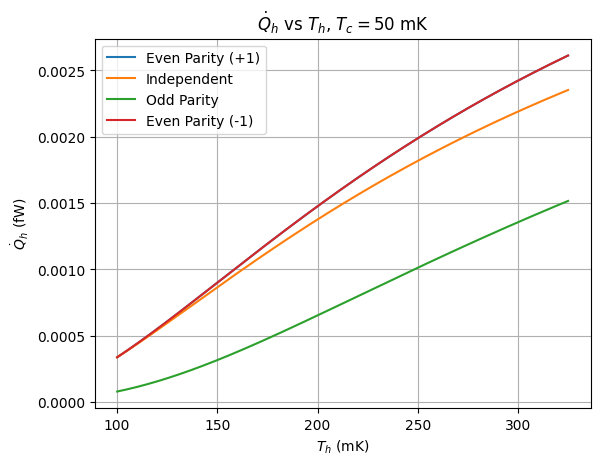

In [45]:
# Plotting Hot Bath Temperature dependence at resonance for all 4 cases discussed
T = (T_h_5*5.6*10**9*6.626*10**-34)/(1.38*10**-23)
plt.plot(T*1e3, 0.662607015*Q_coll_sup_5, label = 'Even Parity (+1)')
plt.plot(T*1e3, 0.662607015*Q_ind_5, label = 'Independent')
plt.plot(T*1e3, 0.662607015*Q_coll_sub_5, label = 'Odd Parity')
plt.plot(T*1e3, 0.662607015*Q_coll_even_5, label = 'Even Parity (-1)')
plt.xlabel(r'$T_{h}$ (mK)')
plt.ylabel(r'$\dot{Q}_h$ (fW)')
plt.title(r'$\dot{Q}_h$ vs $T_h$, $T_c = 50$ mK')
plt.legend()
plt.grid(True)
plt.show()

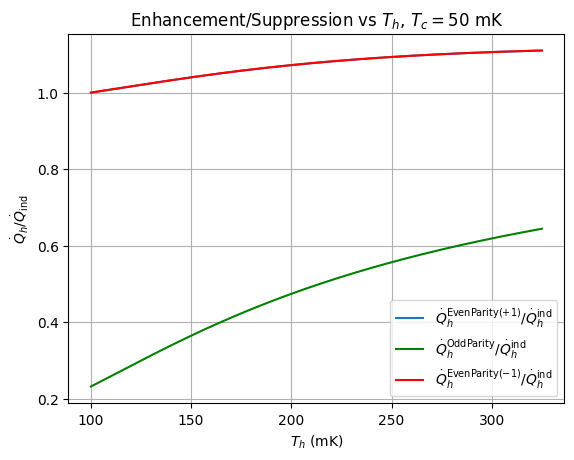

In [46]:
# Plotting Enhancement and Suppression against the hot bath temperature

plt.plot(T*1e3, Ratio_sup_5, label = r'$\dot{Q}_h^{\rm Even Parity (+1)}/\dot{Q}_h^{\rm ind}$')
plt.plot(T*1e3, Ratio_sub_5, label = r'$\dot{Q}_h^{\rm Odd Parity}/\dot{Q}_h^{\rm ind}$', color = "green")
plt.plot(T*1e3, Ratio_even_5, label = r'$\dot{Q}_h^{\rm Even Parity (-1)}/\dot{Q}_h^{\rm ind}$', color = "red")
plt.xlabel(r'$T_{h}$ (mK)')
plt.ylabel(r'$\dot{Q}_h/\dot{Q}_{\rm ind}$')
plt.legend()
plt.title(r'Enhancement/Suppression vs $T_h$, $T_c = 50$ mK')
plt.grid(True)
plt.show()

In [47]:
# Visualizing the loss of the feature we see for the odd case at low values of bath coupling as the coupling is increased

N6 = 51
N7 = 51
   
gamma_h_6 = np.linspace(0.001, 0.1, N6) # Hot bath coupling

w_vals_2 = np.linspace(0.5, 1.5, N7)   # frequency sweep for qubit 1

gamma_c_6 = gamma_h_6                 # Cold bath coupling
gamma_p_6 = 0.001
gamma_deph_6 = 0
T_para_6 = 0.186                         # Parasitic bath
T_h_6   = 1.2087                        # Hot bath
T_c_6    = 0.186  
Qf_6 = 7.1798

Q_ind_6   = np.zeros((N6, N7))       # independent current
Q_coll_sup_6  = np.zeros((N6, N7))   # collective current for even case (+1)
Q_coll_sub_6  = np.zeros((N6, N7))    # collective current for odd case
Ratio_sup_6   = np.zeros((N6, N7))    # enhancement factor for even case (+1)
Ratio_sub_6   = np.zeros((N6, N7))    # suppression factor for odd case


for i, w1 in enumerate(w_vals_2):
    for j, gh in enumerate(gamma_h_6):

        # Independent-bath steady state and current
        rho_ind = QH.rho_ss_termic_indepentend(
            w1, 1,
            gamma_p_6, T_para_6, gamma_deph_6,
            T_h_6, gh, T_c_6, gamma_c_6[j],
            w0, Qf_6
        )
        Q_ind_6[i, j] = QH.Current_ind(w1, 1, rho_ind, T_h_6, gh, w0, Qf_6)
        

        # Collective-bath steady state and current for even case (+1)
        rho_coll_sup = QH.rho_ss_termic_collective_sup(
            w1, 1,
            gamma_p_6, T_para_6, gamma_deph_6,
            T_h_6, gh, T_c_6, gamma_c_6[j],
            w0, Qf_6
        )
        Q_coll_sup_6[i, j] = QH.Current_coll(w1, 1, rho_coll_sup, T_h_6, gh, w0, Qf_6, Jm_h, Jp_h)


        Ratio_sup_6[i, j]  = Q_coll_sup_6[i, j] / Q_ind_6[i, j]
        
        
        # Collective-bath steady state and current for odd case
        rho_coll_sub = QH.rho_ss_termic_collective_sub(
            w1, 1,
            gamma_p_6, T_para_6, gamma_deph_6,
            T_h_6, gh, T_c_6, gamma_c_6[j],
            w0, Qf_6
        )
        Q_coll_sub_6[i, j] = QH.Current_coll(w1, 1, rho_coll_sub, T_h_6, gh, w0, Qf_6, Jm_h, Jp_h)


        Ratio_sub_6[i, j]  = Q_coll_sub_6[i, j] / Q_ind_6[i, j]

<>:5: SyntaxWarning: invalid escape sequence '\g'
<>:5: SyntaxWarning: invalid escape sequence '\g'
C:\Users\trapp\AppData\Local\Temp\ipykernel_22656\1050455653.py:5: SyntaxWarning: invalid escape sequence '\g'
  plt.plot(w_vals_2, 0.662607015*Q_coll_sub_6[:, i], label=f"$\gamma_h/f_r$ = {gh}")


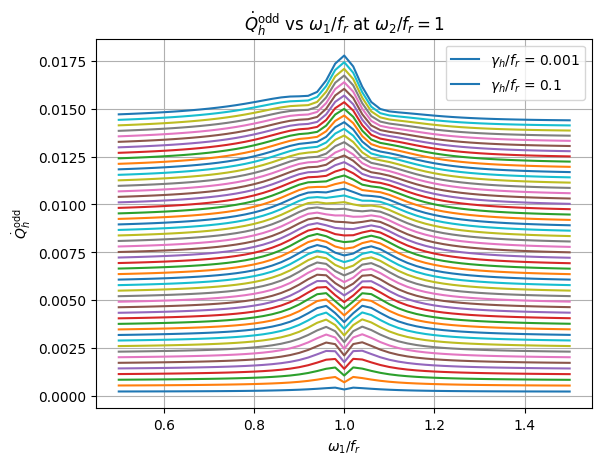

In [48]:
# Plotting by keeping one qubit at resonance and sweeping the other qubit for all 4 cases discussed as coupling strength is increased
# for the even (+1) case and the odd case
for i, gh in enumerate(gamma_h_6):
    if i == 0 or i == 50:
        plt.plot(w_vals_2, 0.662607015*Q_coll_sub_6[:, i], label=f"$\gamma_h/f_r$ = {gh}")
    else:
        plt.plot(w_vals_2, 0.662607015*Q_coll_sub_6[:, i])

plt.xlabel(r'$\omega_1/f_r$')
plt.ylabel(r'$\dot{Q}_h^{\rm odd}$')
plt.title(r'$\dot{Q}_h^{\rm odd}$ vs $\omega_1/f_r$ at $\omega_2/f_r = 1$')
plt.legend()
plt.grid(True)
plt.show()

In [49]:
N8 = 1000
   
#gamma_h_5 = 0.0075
f_r = 5.6e9

w0_vals_3 = np.linspace(0.5, 1.5, N8)

T0_vals_2 = np.linspace(0.134, 0.403, N8)   # frequency sweep for qubit 1

#gamma_c_5 = gamma_h_5                  # Cold bath coupling

T_para_7 = 0.186
gamma_p_7 = 0.001
gamma_deph_7 = 0
Qf_7 = 7.1798

Q_ind_7   = np.zeros(N8)       # independent current
Q_coll_sup_7  = np.zeros(N8)   # collective current for even case (+1)
Q_coll_sub_7  = np.zeros(N8)    # collective current for odd case
Ratio_sup_7  = np.zeros(N8)    # enhancement factor for even case (+1)
Ratio_sub_7  = np.zeros(N8)    # suppression factor for odd case


for i, w1 in enumerate(w0_vals_3):
    
        gamma_h_7 = (0.043*10**9)/(f_r*w1)
        gamma_c_7 = gamma_h_7
        T_h_7 = (7.285*10**9)/(w1*5.6*10**9)
        T_c_7 = (1.04*10**9)/(w1*5.6*10**9)
        # Independent-bath steady state and current
        rho_ind = QH.rho_ss_termic_indepentend(
            w1, w1,
            gamma_p_7, T_para_7, gamma_deph_7,
            T_h_7, gamma_h_7, T_c_7, gamma_c_7,
            w1, Qf_7
        )
        Q_ind_7[i] = QH.Current_ind(w1, w1, rho_ind, T_h_7, gamma_h_7, w1, Qf_7)
        

        # Collective-bath steady state and current for even case (+1)
        rho_coll_sup = QH.rho_ss_termic_collective_sup(
            w1, w1,
            gamma_p_7, T_para_7, gamma_deph_7,
            T_h_7, gamma_h_7, T_c_7, gamma_c_7,
            w1, Qf_7
        )
        Q_coll_sup_7[i] = QH.Current_coll(w1, w1, rho_coll_sup, T_h_7, gamma_h_7, w1, Qf_7, Jm_h, Jp_h)


        Ratio_sup_7[i]  = Q_coll_sup_7[i] / Q_ind_7[i]
        
        
        # Collective-bath steady state and current for odd case
        rho_coll_sub = QH.rho_ss_termic_collective_sub(
            w1, w1,
            gamma_p_7, T_para_7, gamma_deph_7,
            T_h_7, gamma_h_7, T_c_7, gamma_c_7,
            w1, Qf_7
        )
        Q_coll_sub_7[i] = QH.Current_coll(w1, w1, rho_coll_sub, T_h_7, gamma_h_7, w1, Qf_7, Jm_h, Jp_h)


        Ratio_sub_7[i]  = Q_coll_sub_7[i] / Q_ind_7[i]

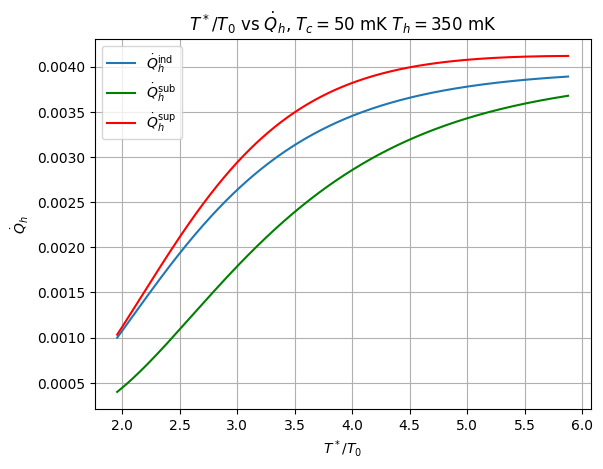

In [50]:
plt.plot(Ts/T0_vals_2, 0.662607015*Q_ind_7, label = r'$\dot{Q}_h^{\rm ind}$')
plt.plot(Ts/T0_vals_2, 0.662607015*Q_coll_sub_7, label = r'$\dot{Q}_h^{\rm sub}$', color = "green")
plt.plot(Ts/T0_vals_2, 0.662607015*Q_coll_sup_7, label = r'$\dot{Q}_h^{\rm sup}$', color = "red")
plt.xlabel(r'$T^*/T_0$')
plt.ylabel(r'$\dot{Q}_h$')
plt.legend()
plt.title(r'$T^*/T_0$ vs $\dot{Q}_h$, $T_c = 50$ mK $T_h = 350$ mK')
plt.grid(True)
plt.show()

In [51]:
N9 = 1000
w0 = 1             # LC resonator frequency (sets the unit scale)
w1 = 1             # Qubit 1 frequency
w2 = 1.02          # Qubit 2 frequency for testing detuned case 
Qf_9 = 7.1798      # Resonator quality factor

# Bath coupling strengths
gamma_h_9   = 0.0075 # Hot bath coupling
gamma_c_9   = 0.0075 # Cold bath coupling
gamma_deph_9 = 0     # Pure dephasing (σ_z)
gamma_p_9 = 0.001      # Parasitic bath relaxation


# Temperatures  (ℏ = k_B = 1)
T_h_9     = 1.2087                    # Hot bath
T_c_9     = 0.186                     # Cold bath
T_para_9 = np.linspace(0.186, 1.673, N9) # Parasitic Bath


Q_ind_9   = np.zeros(N9)      # independent current
Q_coll_sup_9  = np.zeros(N9)  # collective current for even (+1) case
Q_coll_sub_9  = np.zeros(N9)  # collective current for odd case
Ratio_sup_9   = np.zeros(N9)  # enhancement factor for even (+1) case
Ratio_sub_9   = np.zeros(N9)  # suppression factor for odd case 
Q_coll_even_9 = np.zeros(N9)  # collective current for even (-1) case
Ratio_even_9 = np.zeros(N9)   # enhancement factor for even (-1) case
Rho_coh_sup_9 = np.zeros(N9)
Rho_coh_sub_9 = np.zeros(N9)



for k, T_p in enumerate(T_para_9):
    

    # Independent-bath steady state and current
    rho_ind = QH.rho_ss_termic_indepentend(
        w1, w1,
        gamma_p_9, T_p, gamma_deph_9,
        T_h_9, gamma_h_9, T_c_9, gamma_c_9,
        w0, Qf_9
    )
    Q_ind_9[k] = QH.Current_ind(w1, w1, rho_ind, T_h_9, gamma_h_9, w0, Qf_9)
    
    

    # Collective-bath steady state and current for even (+1) case
    rho_coll_sup = QH.rho_ss_termic_collective_sup(
        w1, w1,
        gamma_p_9, T_p, gamma_deph_9,
        T_h_9, gamma_h_9, T_c_9, gamma_c_9,
        w0, Qf_9
    )
    Q_coll_sup_9[k] = QH.Current_coll(w1, w1, rho_coll_sup, T_h_9, gamma_h_9, w0, Qf_9, Jm_h, Jp_h)
    Rho_coh_sup_9[k] = np.real(rho_coll_sup[1][2])
    Ratio_sup_9[k]  = Q_coll_sup_9[k] / Q_ind_9[k]
    
    
    # Collective-bath steady state and current for odd case
    rho_coll_sub = QH.rho_ss_termic_collective_sub(
        w1, w1,
        gamma_p_9, T_p, gamma_deph_9,
        T_h_9, gamma_h_9, T_c_9, gamma_c_9,
        w0, Qf_9
    )
    Q_coll_sub_9[k] = QH.Current_coll(w1, w1, rho_coll_sub, T_h_9, gamma_h_9, w0, Qf_9, Jm_h, Jp_h)
    Rho_coh_sub_9[k] = np.real(rho_coll_sub[1][2])
    Ratio_sub_9[k]  = Q_coll_sub_9[k] / Q_ind_9[k]
    
    
    
    # Collective-bath steady state and current for even(-1) case
    rho_coll_even_2 = QH.rho_ss_termic_collective_sup_2(
        w1, w1,
        gamma_p_9, T_p, gamma_deph_9,
        T_h_9, gamma_h_9, T_c_9, gamma_c_9,
        w0, Qf_9
    )
    Q_coll_even_9[k] = QH.Current_coll(w1, w1, rho_coll_even_2, T_h_9, gamma_h_9, w0, Qf_9, Jm_c, Jp_c)   
    Ratio_even_9[k]  = Q_coll_even_9[k] / Q_ind_9[k]
    

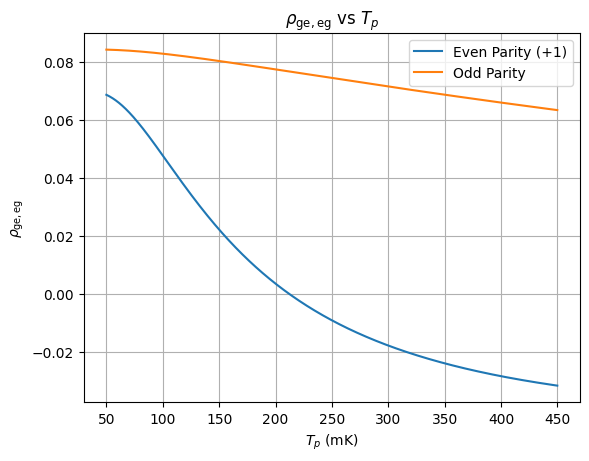

In [52]:
T_parT = (T_para_9*5.6*10**9*6.626*10**(-34))/(1.38*10**(-23))
plt.plot(T_parT*1e3, Rho_coh_sup_9, label = 'Even Parity (+1)')
plt.plot(T_parT*1e3, Rho_coh_sub_9, label = 'Odd Parity')
plt.xlabel(r'$T_p$ (mK)')
plt.ylabel(r'$\rho_{\rm ge, eg}$')
plt.title(r'$\rho_{\rm ge, eg}$ vs $T_p$')
plt.legend()
plt.grid(True)
plt.show()

In [54]:
N10 = 1000
gamma_p_10 = 0.001  # Parasitic bath relaxation
gamma_deph_10  = np.linspace(0.001, 0.1, N10)  # Pure dephasing (σ_z)
gamma_h_10 = 0.0075
gamma_c_10 = gamma_h_10

# Temperatures  (ℏ = k_B = 1)
T_para_10 = 0.186    # Parasitic bath
T_h_10     = 1.2087   # Hot bath
T_c_10     = 0.186    # Cold bath
Qf_10 = 7.1798


Q_ind_10   = np.zeros(N10)      # independent current
Q_coll_sup_10  = np.zeros(N10)  # collective current for even (+1) case
Q_coll_sub_10  = np.zeros(N10)  # collective current for odd case 
Ratio_sup_10   = np.zeros(N10)  # enhancement factor for even (+1) case
Ratio_sub_10   = np.zeros(N10)  # suppression factor for odd case
Q_coll_even_10 = np.zeros(N10)  # collective current for even (+1) case
Ratio_even_10 = np.zeros(N10)
Rho_coh_sup_10 = np.zeros(N10)
Rho_coh_sub_10 = np.zeros(N10)
Rho_onD_sup_10 = np.zeros(N10)
Rho_onD_sub_10 = np.zeros(N10)


for k, gamma_d in enumerate(gamma_deph_10):

    # Independent-bath steady state and current
    rho_ind = QH.rho_ss_termic_indepentend(
        1, 1,
        gamma_p_10, T_para_10, gamma_d,
        T_h_10, gamma_h_10, T_c_10, gamma_c_10,
        w0, Qf_10
    )
    Q_ind_10[k] = QH.Current_ind(1, 1, rho_ind, T_h_10, gamma_h_10, w0, Qf_10)

    # Collective-bath steady state and current for even case (+1)
    rho_coll_sup = QH.rho_ss_termic_collective_sup(
        1, 1,
        gamma_p_10, T_para_10, gamma_d,
        T_h_10, gamma_h_10, T_c_10, gamma_c_10,
        w0, Qf_10
    )
    Q_coll_sup_10[k] = QH.Current_coll(1, 1, rho_coll_sup, T_h_10, gamma_h_10, w0, Qf_10, Jm_h, Jp_h)
    Rho_coh_sup_10[k] = np.real(rho_coll_sup[1][2])
    Rho_onD_sup_10[k] = np.real(rho_coll_sup[1][1])


    Ratio_sup_10[k]  = Q_coll_sup_10[k] / Q_ind_10[k]
    
    
    # Collective-bath steady state and current for odd case
    rho_coll_sub = QH.rho_ss_termic_collective_sub(
        1, 1,
        gamma_p_10, T_para_10, gamma_d,
        T_h_10, gamma_h_10, T_c_10, gamma_c_10,
        w0, Qf_10
    )
    Q_coll_sub_10[k] = QH.Current_coll(1, 1, rho_coll_sub, T_h_10, gamma_h_10, w0, Qf_10, Jm_h, Jp_h)
    Rho_coh_sub_10[k] = np.real(rho_coll_sub[1][2])
    Rho_onD_sub_10[k] = np.real(rho_coll_sub[1][1])


    Ratio_sub_10[k]  = Q_coll_sub_10[k] / Q_ind_10[k]
    
    

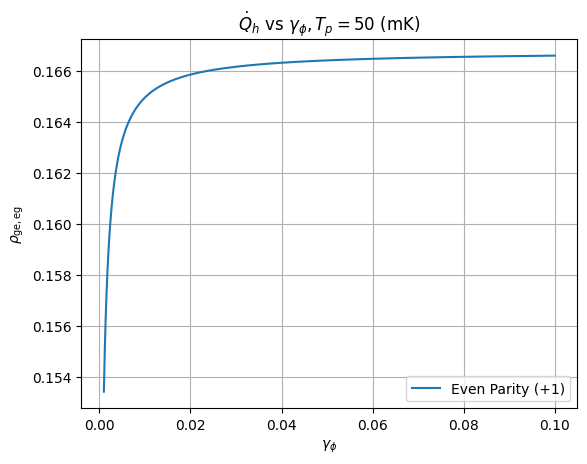

In [55]:
plt.plot(gamma_deph_10, Rho_onD_sup_10, label = 'Even Parity (+1)')
#plt.plot(gamma_deph_10, Rho_onD_sub_10, label = 'Odd Parity')
plt.xlabel(r'$\gamma_{\phi}$')
plt.ylabel(r'$\rho_{\rm ge,eg}$')
plt.title(r'$\dot{Q}_h$ vs $\gamma_{\phi}, T_p = 50$ (mK)')
plt.legend()
plt.grid(True)
plt.show()

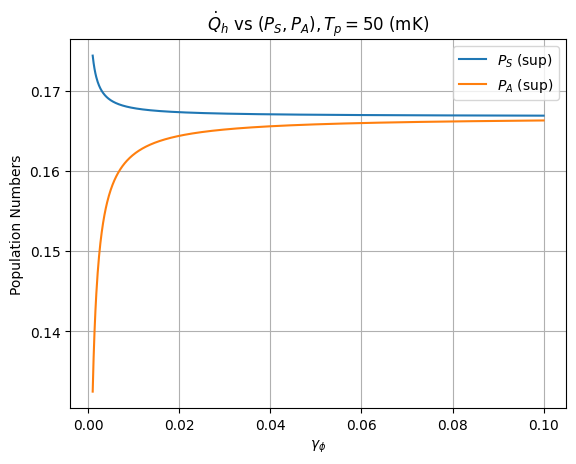

In [56]:
plt.plot(gamma_deph_10, Rho_onD_sup_10+Rho_coh_sup_10, label = r'$P_S$ (sup)')
plt.plot(gamma_deph_10, Rho_onD_sup_10-Rho_coh_sup_10, label = r'$P_A$ (sup)')
plt.xlabel(r'$\gamma_{\phi}$')
plt.ylabel(r'Population Numbers')
plt.title(r'$\dot{Q}_h$ vs $(P_S, P_A), T_p = 50$ (mK)')
plt.legend()
plt.grid(True)
plt.show()

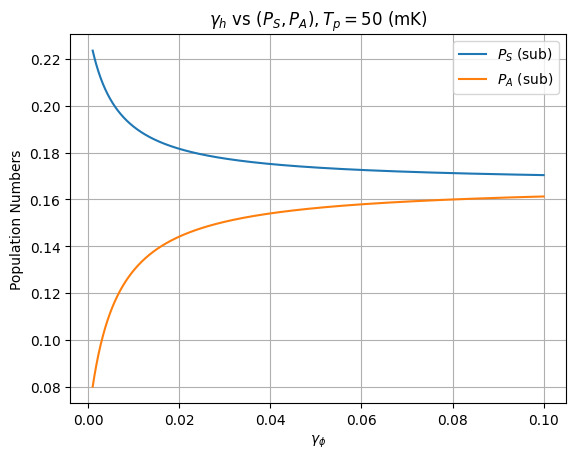

In [57]:
plt.plot(gamma_deph_10, Rho_onD_sub_10+Rho_coh_sub_10, label = r'$P_S$ (sub)')
plt.plot(gamma_deph_10, Rho_onD_sub_10-Rho_coh_sub_10, label = r'$P_A$ (sub)')
plt.xlabel(r'$\gamma_{\phi}$')
plt.ylabel(r'Population Numbers')
plt.title(r'$\gamma_h$ vs $(P_S, P_A), T_p = 50$ (mK)')
plt.legend()
plt.grid(True)
plt.show()

In [22]:
# Calculating the dependence of Heat Current at resonance for all 4 cases discussed againt Hot bath coupling strength
# while keeping cold bath fixed

N11 = 1000
Qf_11 = 7.1798      # LC Resonator Quality Factor
gamma_p_11 = 0.001  # Parasitic relaxation
gamma_deph_11  = 0  # Pure dephasing (σ_z)

# Temperatures  (ℏ = k_B = 1)
T_para_11 = 0.186                         # Parasitic bath
T_h_11   = 1.2087                        # Hot bath
T_c_11   = 0.186                         # Cold bath   
gamma_h_11 = np.linspace(0.001, 0.1, N11) # Hot bath coupling
gamma_c_11 = gamma_h_11                  # Cold bath coupling


Q_ind_11  = np.zeros(N11)      # independent current
Q_coll_sup_11  = np.zeros(N11)  # collective current for even case (+1)
Q_coll_sub_11 = np.zeros(N11)  # collective current for odd case
Ratio_sup_11   = np.zeros(N11)  # enhancement factor for even case (+1)
Ratio_sub_11   = np.zeros(N11)  # suppression factor for odd case
Q_coll_even_11 = np.zeros(N11)  # collective current for even case (-1)
Ratio_even_11 = np.zeros(N11)   # enhancement factor for even case (-1)
Rho_coh_sup_11 = np.zeros(N11)
Rho_coh_sub_11 = np.zeros(N11)
Rho_coh_mup_11 = np.zeros(N11)
Rho_tot_sup_11 = np.zeros((N11, 4, 4))
Rho_tot_sub_11 = np.zeros((N11, 4, 4))
Rho_tot_mup_11 = np.zeros((N11, 4, 4))


for k, gh in enumerate(gamma_h_11):

    # Independent-bath steady state and current
    rho_ind = QH.rho_ss_termic_indepentend(
        1, 1.02,
        gamma_p_11, T_para_11, gamma_deph_11,
        T_h_11, gh, T_c_11, gamma_c_11[k],
        w0, Qf_11
    )
    Q_ind_11[k] = QH.Current_ind(1, 1.02, rho_ind, T_h_11, gh, w0, Qf_11)
    
    

    # Collective-bath steady state and current for even case (+1)
    rho_coll_sup = QH.rho_ss_termic_collective_sup(
        1, 1.02,
        gamma_p_11, T_para_11, gamma_deph_11,
        T_h_11, gh, T_c_11, gamma_c_11[k],
        w0, Qf_11
    )
    Q_coll_sup_11[k] = QH.Current_coll(1, 1.02, rho_coll_sup, T_h_11, gh, w0, Qf_11, Jm_h, Jp_h)
    Rho_tot_sup_11[k, :, :] = np.real(rho_coll_sup.full())
    Rho_coh_sup_11[k] = np.real(rho_coll_sup[1][2])


    Ratio_sup_11[k]  = Q_coll_sup_11[k] / Q_ind_11[k]
    
    
    # Collective-bath steady state and current for odd case
    rho_coll_sub = QH.rho_ss_termic_collective_sub(
        1, 1.02,
        gamma_p_11, T_para_11, gamma_deph_11,
        T_h_11, gh, T_c_11, gamma_c_11[k],
        w0, Qf_11
    )
    Q_coll_sub_11[k] = QH.Current_coll(1, 1.02, rho_coll_sub, T_h_11, gh, w0, Qf_11, Jm_h, Jp_h)
    Rho_tot_sub_11[k, :, :] = np.real(rho_coll_sub.full())
    Rho_coh_sub_11[k] = np.real(rho_coll_sub[1][2])


    Ratio_sub_11[k]  = Q_coll_sub_11[k] / Q_ind_11[k]
    
    
    
    # Collective-bath steady state and current for even case (-1)
    rho_coll_even_4 = QH.rho_ss_termic_collective_sup_2(
        1, 1.02,
        gamma_p_11, T_para_11, gamma_deph_11,
        T_h_11, gh, T_c_11, gamma_c_11[k],
        w0, Qf_11
    )
    Q_coll_even_11[k] = QH.Current_coll(1, 1.02, rho_coll_even_4, T_h_11, gh, w0, Qf_11, Jm_c, Jp_c)
    Rho_tot_mup_11[k, :, :] = np.real(rho_coll_even_4.full())
    Rho_coh_mup_11[k] = np.real(rho_coll_even_4[1][2])


    Ratio_even_11[k]  = Q_coll_even_11[k] / Q_ind_11[k]

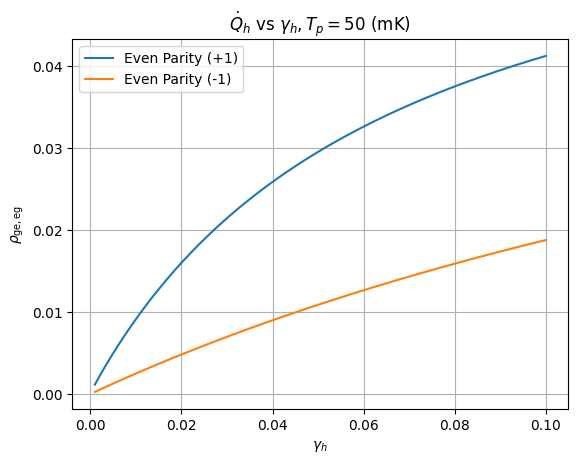

In [ ]:
plt.plot(gamma_h_11, Rho_coh_sup_11, label = 'Even Parity (+1)')
#plt.plot(gamma_h_3, Rho_coh_sub_2, label = 'Odd Parity')
plt.plot(gamma_h_11, np.abs(Rho_coh_mup_11), label = 'Even Parity (-1)')
plt.xlabel(r'$\gamma_h$')
plt.ylabel(r'$\rho_{\rm ge,eg}$')
plt.title(r'$\rho_{\rm ge,eg}$ vs $\gamma_{h}, T_p = 50$ (mK)')
plt.legend()
plt.grid(True)
plt.show()

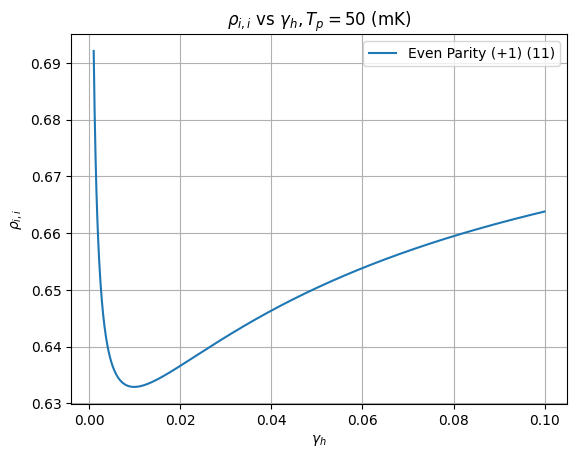

In [40]:
plt.plot(gamma_h_11, Rho_tot_sup_11[:, 3, 3], label = 'Even Parity (+1) (11)')
#plt.plot(gamma_h_3, Rho_coh_sub_2, label = 'Odd Parity')
#plt.plot(gamma_h_11, Rho_tot_mup_11[:, 0, 0], label = 'Even Parity (-1)')
plt.xlabel(r'$\gamma_h$')
plt.ylabel(r'$\rho_{i, i}$')
plt.title(r'$\rho_{i, i}$ vs $\gamma_{h}, T_p = 50$ (mK)')
plt.legend()
plt.grid(True)
plt.show()

In [60]:
NP = 1000
gamma_deph_p = 0  # Parasitic bath relaxation
gamma_para_p  = np.linspace(0.0001, 0.1, NP)  # Pure dephasing (σ_z)

# Temperatures  (ℏ = k_B = 1)
T_para_p = 0.186    # Parasitic bath
T_h_p   = 1.2087   # Hot bath
T_c_p     = 0.186    # Cold bath
gamma_h_p = 0.0075
gamma_c_p = 0.0075
Qf_p = 7.1798

Q_ind_p   = np.zeros(NP)      # independent current
Q_coll_sup_p  = np.zeros(NP)  # collective current for even (+1) case
Q_coll_sub_p  = np.zeros(NP)  # collective current for odd case 
Ratio_sup_p   = np.zeros(NP)  # enhancement factor for even (+1) case
Ratio_sub_p   = np.zeros(NP)  # suppression factor for odd case
Q_coll_even_p = np.zeros(NP)  # collective current for even (+1) case
Ratio_even_p = np.zeros(NP)
Rho_coll_sup_para = np.zeros((NP,4,4))
Rho_coll_sub_para = np.zeros((NP,4,4))


for k, gamma_p in enumerate(gamma_para_p):

    # Independent-bath steady state and current
    rho_ind = QH.rho_ss_termic_indepentend(
        1, 1,
        gamma_p, T_para_p, gamma_deph_p,
        T_h_p, gamma_h_p, T_c_p, gamma_c_p,
        w0, Qf_p
    )
    Q_ind_p[k] = QH.Current_ind(1, 1, rho_ind, T_h_p, gamma_h_p, w0, Qf_p)

    # Collective-bath steady state and current for even case (+1)
    rho_coll_sup = QH.rho_ss_termic_collective_sup(
        1, 1,
        gamma_p, T_para_p, gamma_deph_p,
        T_h_p, gamma_h_p, T_c_p, gamma_c_p,
        w0, Qf_p
    )
    Rho_coll_sup_para[k, :, :] = np.real(rho_coll_sup.full())
    Q_coll_sup_p[k] = QH.Current_coll(1, 1, rho_coll_sup, T_h_p, gamma_h_p, w0, Qf_p, Jm_h, Jp_h)


    Ratio_sup_p[k]  = Q_coll_sup_p[k] / Q_ind_p[k]
    
    
    # Collective-bath steady state and current for odd case
    rho_coll_sub = QH.rho_ss_termic_collective_sub(
        1, 1,
        gamma_p, T_para_p, gamma_deph_p,
        T_h_p, gamma_h_p, T_c_p, gamma_c_p,
        w0, Qf_p
    )
    
    Rho_coll_sub_para[k, :, :] = np.real(rho_coll_sub.full())
    Q_coll_sub_p[k] = QH.Current_coll(1, 1, rho_coll_sub, T_h_p, gamma_h_p, w0, Qf_p, Jm_h, Jp_h)


    Ratio_sub_p[k]  = Q_coll_sub_p[k] / Q_ind_p[k]
    
    
    # Collective-bath steady state and current for even case (-1)
    rho_coll_even_p = QH.rho_ss_termic_collective_sup_2(
        1, 1,
        gamma_p, T_para_p, gamma_deph_p,
        T_h_p, gamma_h_p, T_c_p, gamma_c_p,
        w0, Qf_p
    )
    Q_coll_even_p[k] = QH.Current_coll(1, 1, rho_coll_even_p, T_h_p, gamma_h_p, w0, Qf_p, Jm_c, Jp_c)


    Ratio_even_p[k]  = Q_coll_even_p[k] / Q_ind_p[k]

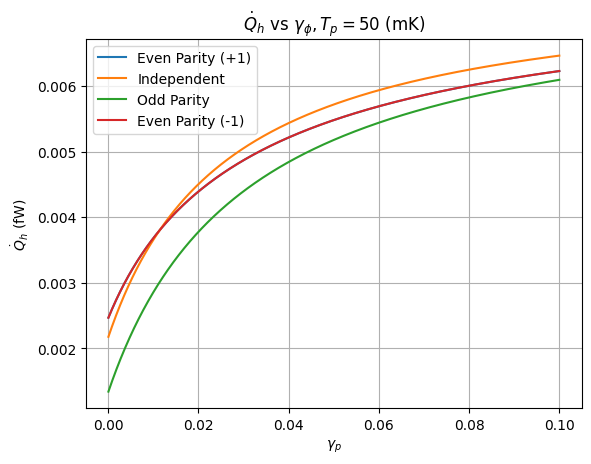

In [61]:
plt.plot(gamma_para_p, 0.662607015*Q_coll_sup_p, label = 'Even Parity (+1)')
plt.plot(gamma_para_p, 0.662607015*Q_ind_p, label = 'Independent')
plt.plot(gamma_para_p, 0.662607015*Q_coll_sub_p, label = 'Odd Parity')
plt.plot(gamma_para_p, 0.662607015*Q_coll_even_p, label = 'Even Parity (-1)')
plt.xlabel(r'$\gamma_{p}$')
plt.ylabel(r'$\dot{Q}_h$ (fW)')
plt.title(r'$\dot{Q}_h$ vs $\gamma_{\phi}, T_p = 50$ (mK)')
plt.legend()
plt.grid(True)
plt.show()

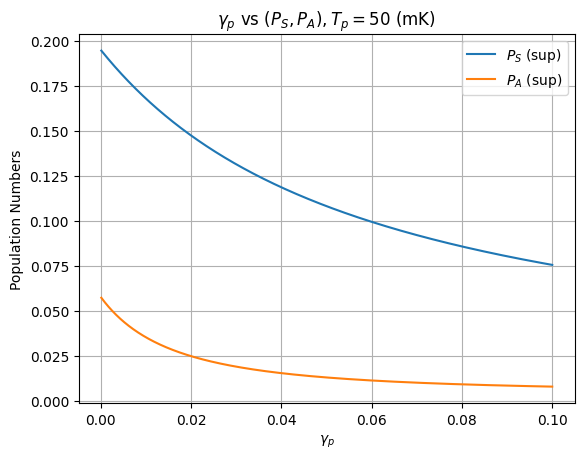

In [62]:
plt.plot(gamma_para_p, Rho_coll_sup_para[:, 1, 1] + Rho_coll_sup_para[:, 1, 2], label = r'$P_S$ (sup)')
plt.plot(gamma_para_p, Rho_coll_sup_para[:, 1, 1] - Rho_coll_sup_para[:, 1, 2], label = r'$P_A$ (sup)')
plt.xlabel(r'$\gamma_p$')
plt.ylabel(r'Population Numbers')
plt.title(r'$\gamma_p$ vs $(P_S, P_A), T_p = 50$ (mK)')
plt.legend()
plt.grid(True)
plt.show()

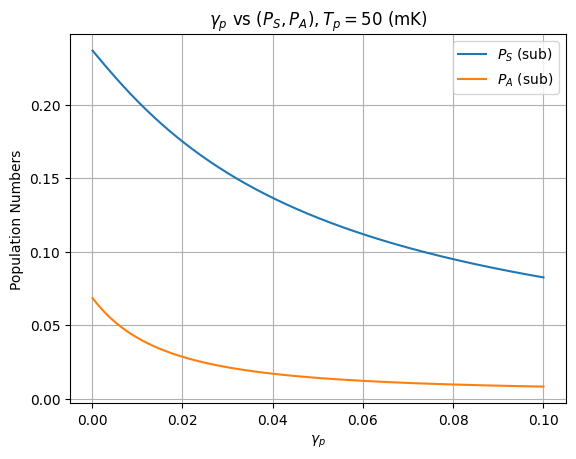

In [63]:
plt.plot(gamma_para_p, Rho_coll_sub_para[:, 1, 1] + Rho_coll_sub_para[:, 1, 2], label = r'$P_S$ (sub)')
plt.plot(gamma_para_p, Rho_coll_sub_para[:, 1, 1] - Rho_coll_sub_para[:, 1, 2], label = r'$P_A$ (sub)')
plt.xlabel(r'$\gamma_p$')
plt.ylabel(r'Population Numbers')
plt.title(r'$\gamma_p$ vs $(P_S, P_A), T_p = 50$ (mK)')
plt.legend()
plt.grid(True)
plt.show()

In [71]:
Npd = 101
gamma_deph_pd = np.linspace(0, 0.001/10, Npd)  # Parasitic bath relaxation
gamma_para_pd  = np.linspace(0.000001, 0.001, Npd)  # Pure dephasing (σ_z)

# Temperatures  (ℏ = k_B = 1)
T_para_pd = 0.186    # Parasitic bath
T_h_pd   = 1.2087   # Hot bath
T_c_pd     = 0.186    # Cold bath
gamma_h_pd = 0.0075
gamma_c_pd = 0.0075
Qf_pd = 7.1798

Q_ind_pd  = np.zeros((Npd, Npd))      # independent current
Q_coll_sup_pd  = np.zeros((Npd, Npd))        # collective current for even (+1) case
Q_coll_sub_pd  = np.zeros((Npd, Npd))        # collective current for odd case 
Ratio_sup_pd  = np.zeros((Npd, Npd))  # enhancement factor for even (+1) case
Ratio_sub_pd   = np.zeros((Npd, Npd))  # suppression factor for odd case
Q_coll_even_pd = np.zeros((Npd, Npd))  # collective current for even (+1) case
Ratio_even_pd = np.zeros((Npd, Npd))
Rho_coll_sup_pd = np.zeros((Npd, Npd, 4,4))
Rho_coll_sub_pd = np.zeros((Npd, Npd, 4,4))


for k, gamma_p in enumerate(gamma_para_pd):
    for l, gamma_d in enumerate(gamma_deph_pd):

        # Independent-bath steady state and current
        rho_ind = QH.rho_ss_termic_indepentend(
            1, 1,
            gamma_p, T_para_pd, gamma_d,
            T_h_pd, gamma_h_pd, T_c_pd, gamma_c_pd,
            w0, Qf_pd
        )
        Q_ind_pd[k, l] = QH.Current_ind(1, 1, rho_ind, T_h_pd, gamma_h_pd, w0, Qf_pd)

        # Collective-bath steady state and current for even case (+1)
        rho_coll_sup = QH.rho_ss_termic_collective_sup(
            1, 1,
            gamma_p, T_para_pd, gamma_d,
            T_h_pd, gamma_h_pd, T_c_pd, gamma_c_pd,
            w0, Qf_pd
        )
        Rho_coll_sup_pd[k, l, :, :] = np.real(rho_coll_sup.full())
        Q_coll_sup_pd[k, l] = QH.Current_coll(1, 1, rho_coll_sup, T_h_pd, gamma_h_pd, w0, Qf_pd, Jm_h, Jp_h)


        Ratio_sup_pd[k, l]  = Q_coll_sup_pd[k, l] / Q_ind_pd[k, l]


        # Collective-bath steady state and current for odd case
        rho_coll_sub = QH.rho_ss_termic_collective_sub(
            1, 1,
            gamma_p, T_para_pd, gamma_d,
            T_h_pd, gamma_h_pd, T_c_pd, gamma_c_pd,
            w0, Qf_pd
        )

        Rho_coll_sub_pd[k, l, :, :] = np.real(rho_coll_sub.full())
        Q_coll_sub_pd[k, l] = QH.Current_coll(1, 1, rho_coll_sub, T_h_pd, gamma_h_pd, w0, Qf_pd, Jm_h, Jp_h)


        Ratio_sub_pd[k, l]  = Q_coll_sub_pd[k, l] / Q_ind_pd[k, l]


        # Collective-bath steady state and current for even case (-1)
        rho_coll_even_p = QH.rho_ss_termic_collective_sup_2(
            1, 1,
            gamma_p, T_para_pd, gamma_d,
            T_h_pd, gamma_h_pd, T_c_pd, gamma_c_pd,
            w0, Qf_pd
        )
        Q_coll_even_pd[k, l] = QH.Current_coll(1, 1, rho_coll_even_p, T_h_pd, gamma_h_pd, w0, Qf_pd, Jm_c, Jp_c)


        Ratio_even_pd[k, l]  = Q_coll_even_pd[k, l] / Q_ind_pd[k, l]

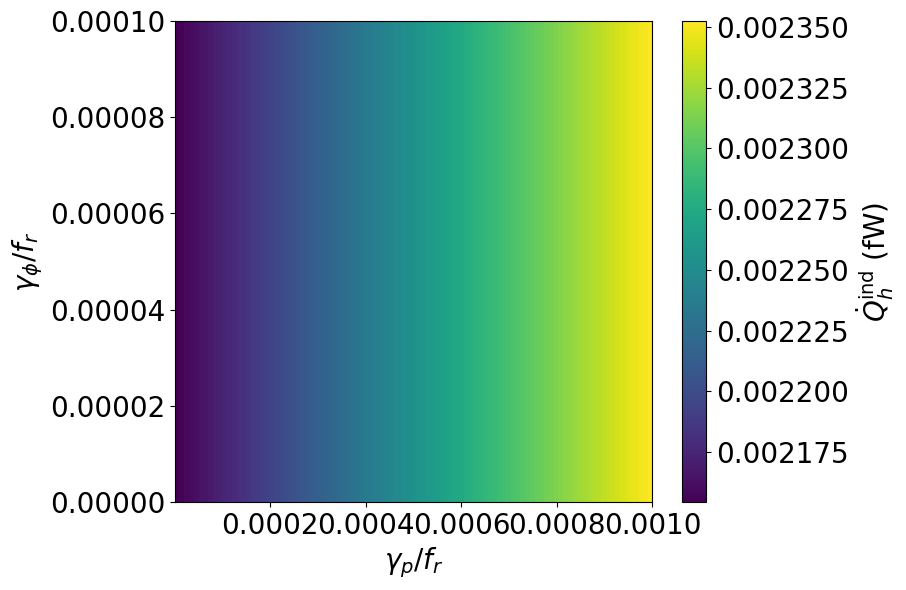

In [72]:
plt.figure(figsize=(9, 6))
#rc('text',usetex=True)

cp = plt.imshow(
    0.662607015*(Q_ind_pd.T), 
    extent=(gamma_para_pd.min(), gamma_para_pd.max(), gamma_deph_pd.min(), gamma_deph_pd.max()),
    aspect='auto',
    origin='lower'
)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.xlabel(r'$\gamma_{p}/f_r$', fontsize=20)
plt.ylabel(r'$\gamma_{\phi}/f_r$', fontsize=20)

cbar = plt.colorbar(cp)
# Imposto la label con fontsize
cbar.set_label(r'$\dot Q^{\rm ind}_h$ (fW)', fontsize=20)
# Regolo la dimensione dei tick
cbar.ax.tick_params(labelsize=20)

plt.tight_layout()

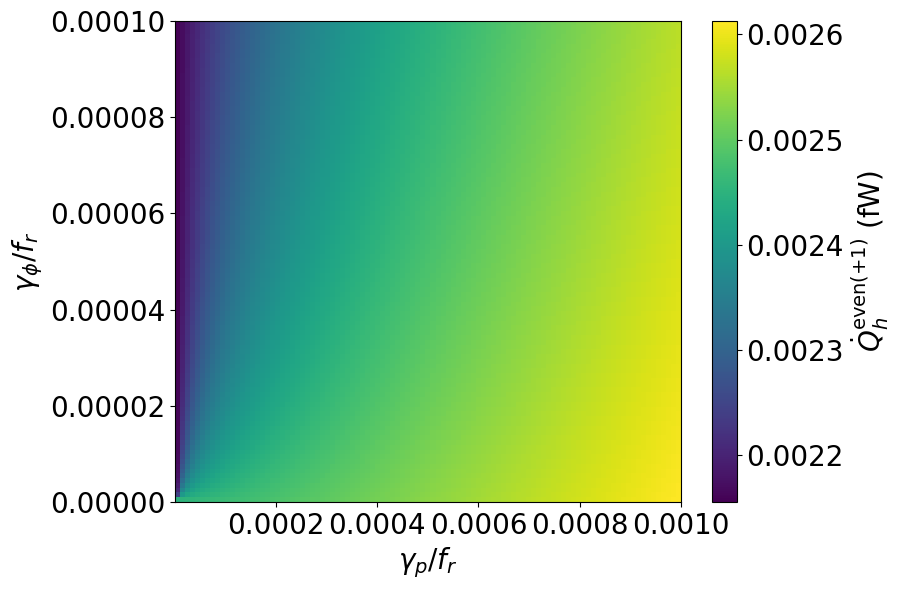

In [73]:
plt.figure(figsize=(9, 6))
#rc('text',usetex=True)

cp = plt.imshow(
    0.662607015*(Q_coll_sup_pd.T), 
    extent=(gamma_para_pd.min(), gamma_para_pd.max(), gamma_deph_pd.min(), gamma_deph_pd.max()),
    aspect='auto',
    origin='lower'
)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.xlabel(r'$\gamma_{p}/f_r$', fontsize=20)
plt.ylabel(r'$\gamma_{\phi}/f_r$', fontsize=20)

cbar = plt.colorbar(cp)
# Imposto la label con fontsize
cbar.set_label(r'$\dot Q^{\rm even(+1)}_h$ (fW)', fontsize=20)
# Regolo la dimensione dei tick
cbar.ax.tick_params(labelsize=20)

plt.tight_layout()

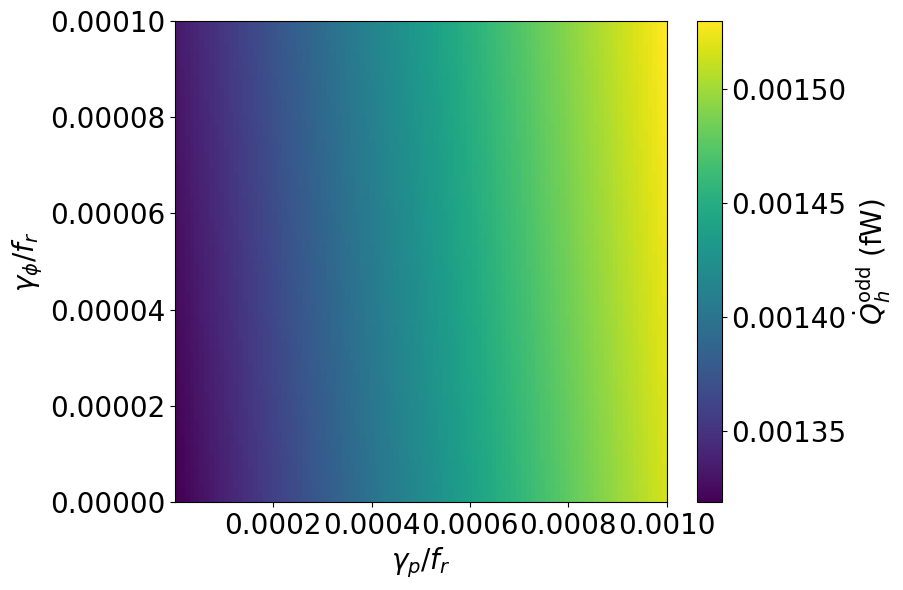

In [74]:
plt.figure(figsize=(9, 6))
matplotlib.rcParams['text.usetex'] = False

cp = plt.imshow(
    0.662607015*(Q_coll_sub_pd.T), 
    extent=(gamma_para_pd.min(), gamma_para_pd.max(), gamma_deph_pd.min(), gamma_deph_pd.max()),
    aspect='auto',
    origin='lower'
)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.xlabel(r'$\gamma_{p}/f_r$', fontsize=20)
plt.ylabel(r'$\gamma_{\phi}/f_r$', fontsize=20)

cbar = plt.colorbar(cp)
# Imposto la label con fontsize
cbar.set_label(r'$\dot Q^{\rm odd}_h$ (fW)', fontsize=20)
# Regolo la dimensione dei tick
cbar.ax.tick_params(labelsize=20)

plt.tight_layout()

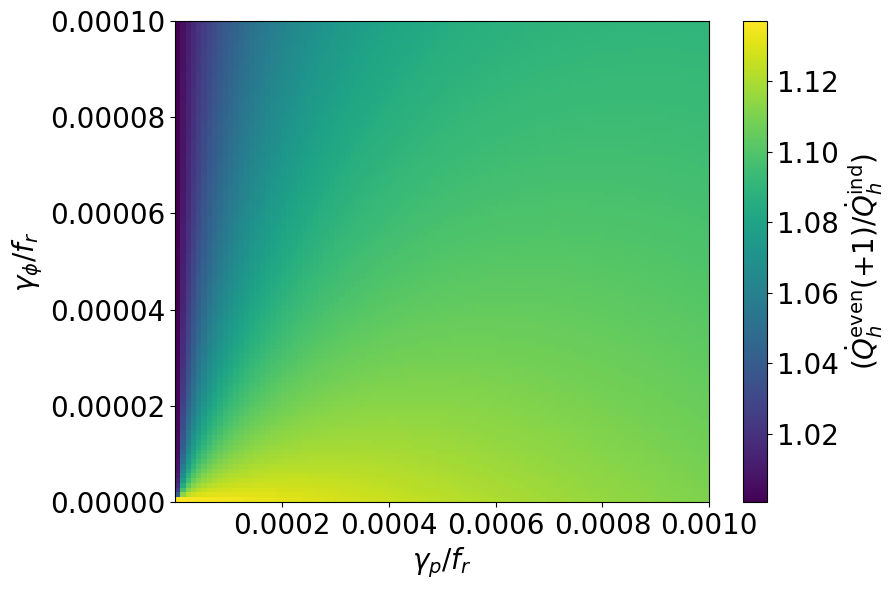

In [75]:
plt.figure(figsize=(9, 6))
#rc('text',usetex=True)

cp = plt.imshow(
    (Ratio_sup_pd.T), 
    extent=(gamma_para_pd.min(), gamma_para_pd.max(), gamma_deph_pd.min(), gamma_deph_pd.max()),
    aspect='auto',
    origin='lower'
)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.xlabel(r'$\gamma_{p}/f_r$', fontsize=20)
plt.ylabel(r'$\gamma_{\phi}/f_r$', fontsize=20)

cbar = plt.colorbar(cp)
# Imposto la label con fontsize
cbar.set_label(r'$(\dot Q_h^{\rm even} (+1)/\dot Q_h^{\rm ind})$', fontsize=20)
# Regolo la dimensione dei tick
cbar.ax.tick_params(labelsize=20)

plt.tight_layout()

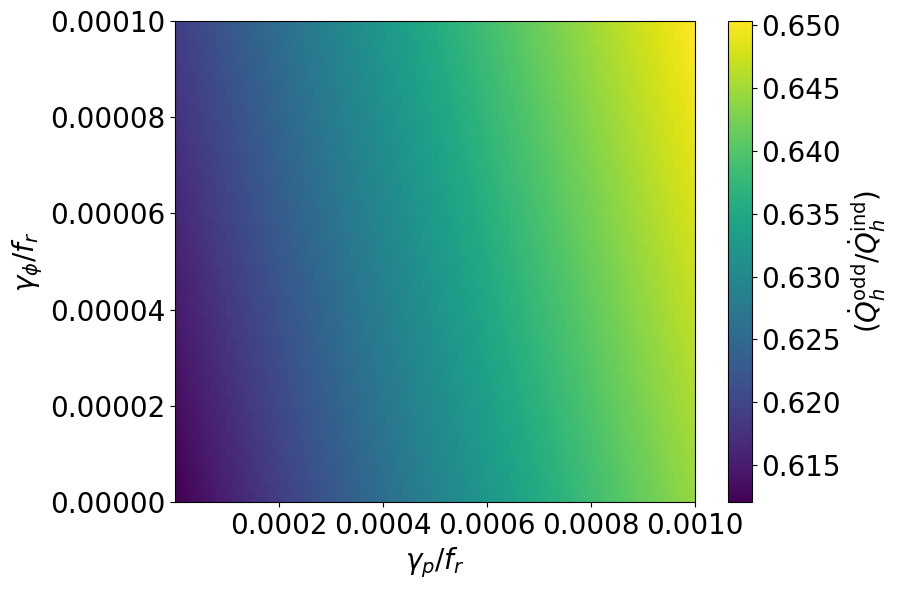

In [76]:
plt.figure(figsize=(9, 6))
#rc('text',usetex=True)

cp = plt.imshow(
    (Ratio_sub_pd.T), 
    extent=(gamma_para_pd.min(), gamma_para_pd.max(), gamma_deph_pd.min(), gamma_deph_pd.max()),
    aspect='auto',
    origin='lower'
)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.xlabel(r'$\gamma_{p}/f_r$', fontsize=20)
plt.ylabel(r'$\gamma_{\phi}/f_r$', fontsize=20)

cbar = plt.colorbar(cp)
# Imposto la label con fontsize
cbar.set_label(r'$(\dot Q_h^{\rm odd}/\dot Q_h^{\rm ind})$', fontsize=20)
# Regolo la dimensione dei tick
cbar.ax.tick_params(labelsize=20)

plt.tight_layout()